# Walmart - Business Case Study

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: Walmart_data.csv

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

In [81]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

import statistics
from scipy.stats import norm

In [13]:
# Read the csv file "Walmart.csv" and store it in a dataframe
df = pd.read_csv("Walmart.csv")

In [14]:
# Display first 10 rows
df.head(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969  
5                          3               0                 1     15227  
6                          2               1                 1     19215  
7                          2               1                 1     15854  
8                          2               1                 1     15686  
9                          1               1                 8      7871

### Dataset Description

- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

#### Observation:
1. No nested data.

2. Gender, Occupation, City_Category, Marital_Status and Product_Category are categorical columns.

3. Age is in bins, there are multiple enteries for user ids as one user might have purchased multiple number of times.

In [15]:
# Generate descriptive statistics for all columns in the DataFrame, including both numerical and categorical data
df.describe(include='all')

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068   550068.000000     550068.000000   
unique                          5             NaN               NaN   
top                             1             NaN               NaN   
freq                       193821             NaN               NaN   
mean                          NaN        0.409653          5.404270   
std                           NaN        0.491770          3.936211   
min                           NaN        0.000000          1.000000   
25%                           NaN        0.000000          1.000000   
50%                           NaN        0.000000          5.000000   
75%                           NaN        1.000000          8.000000   
max                           NaN        1.000000         20.000000   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

## Observations -

1. Most of the entries are for male gender. The data is imbalanced.

2. The top Age bin is 26-35, meaning most of the customers are in this age range.

3. We cannot say much about Occupation, Marital_Status and Product_Category, as we are not getting correct insights for them. Those are categorical dimensions, but python is not able to correctly interpret them. We will discuss them in detail moving forward.

4. The top City_Category is B, with 231173 customers being from that city.

5. Most of the customers stayed in the current city for 1 year.

6. The average purchase amount for this sample is 9263\, but the standard deviation is too high being 5023. The median seems to be a good stat with 8047.

In [16]:
# Display a concise summary of the DataFrame, including the column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB



User_ID, Occupation, Marital_Status and Product_Category are categorical values but Python considers them as integer values, we need to update these.

In [17]:
# Updating the data type for User_ID, Occupation, Marital_Status and Product_Category to Object
df[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']] = df[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']].astype('object')

In [18]:
# Display a concise summary of the DataFrame, including the column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [19]:
# Generate descriptive statistics for all columns in the DataFrame, including both numerical and categorical data
df.describe(include='all')

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068.0     550068  550068  550068    550068.0        550068   
unique     5891.0       3631       2       7        21.0             3   
top     1001680.0  P00265242       M   26-35         4.0             B   
freq       1026.0       1880  414259  219587     72308.0        231173   
mean          NaN        NaN     NaN     NaN         NaN           NaN   
std           NaN        NaN     NaN     NaN         NaN           NaN   
min           NaN        NaN     NaN     NaN         NaN           NaN   
25%           NaN        NaN     NaN     NaN         NaN           NaN   
50%           NaN        NaN     NaN     NaN         NaN           NaN   
75%           NaN        NaN     NaN     NaN         NaN           NaN   
max           NaN        NaN     NaN     NaN         NaN           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068        550068.0          550068.0   
unique                          5             2.0              20.0   
top                             1             0.0               5.0   
freq                       193821        324731.0          150933.0   
mean                          NaN             NaN               NaN   
std                           NaN             NaN               NaN   
min                           NaN             NaN               NaN   
25%                           NaN             NaN               NaN   
50%                           NaN             NaN               NaN   
75%                           NaN             NaN               NaN   
max                           NaN             NaN               NaN   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

## Observations -

Now, we have updated the correct data types, so we can analyse certain columns appropriately - 

1. There are 5891 unique customers in this sample set, with maximum enteries (1026) for the customer with ID: 1001680
2. There are 21 categories for occupation. Most of the customers belong to Occupation category 4, with 72308 enteries.
3. Most of the customers in this dataset are unmarried (324731)
4. There are 20 different categories of products in this sample dataset. A lot of products (150933) that were purchased belong to Product_Category 5.

In [21]:
df.duplicated().sum()

0

There are no duplicate records in the data

## Functions used for Analysis

### Missing Value calculator

In [1]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md

### Categorical Variable Analysis

In [3]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'lightgrey')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("Paired"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("Paired"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1

### Frequency Graph in percentage

In [4]:
# Frequency of each feature in percentage.
def bar_plot_percentage(df, colnames, sortbyindex=False):
    fig = plt.figure(figsize=(32, 36))
    fig.set_facecolor("lightgrey")
    string = "Frequency of "
    for colname in colnames:
        plt.subplot(5,2,colnames.index(colname)+1)
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette('Paired'))
        plt.xticks(rotation = 70,fontsize=14,family="Comic Sans MS")
        plt.yticks(fontsize=14,family="Comic Sans MS")
        plt.ylabel(string, fontsize=14,family = "Comic Sans MS")
        plt.xlabel(colname, fontsize=14,family = "Comic Sans MS")
        string = "Frequency of "

### Bi-Varainte Analysis for Numerical and Categorical variables

In [5]:
def num_cat_bi(df,col_cat,col_num,nrows=1,mcols=2,width=15,height=6):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    i = 0
    while rows < nrows:
        sns.boxplot(x = col_cat[i],y = col_num, data = df,ax=ax[rows][0],palette="Paired")
        ax[rows][0].set_xlabel(col_cat[i], fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel(col_num,fontweight="bold", fontsize=14,family = "Comic Sans MS")
        i += 1
        sns.boxplot(x = col_cat[i],y = col_num, data = df,ax=ax[rows][1],palette="Paired")
        ax[rows][1].set_xlabel(col_cat[i], fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_ylabel(col_num,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        i += 1
        rows += 1
    plt.show()

### Distribution plot based on the Male and Female

In [68]:
def bar_M_vs_F(colname):
    fig = plt.figure(figsize=(16,6))

    male = df_1[df_1["Gender"]=='M'][colname].value_counts().reset_index()
    male["percentage"]  = (male[colname]*100/male[colname].sum())
    male["legends"]        = "Male"


    female = df_1[df_1["Gender"]=='F'][colname].value_counts().reset_index()
    female["percentage"] = (female[colname]*100/female[colname].sum())
    female["legends"]    = "Female"

    m_f_status = pd.concat([female,male],axis=0)

    ax = sns.barplot(x="index",y="percentage",data=m_f_status,hue="legends",palette="Blues_d")
    plt.xlabel(colname)
    fig.set_facecolor("white")
    plt.title(colname + "percentage in data with respect to churn status")

### Multi-Variate Analysis for Numerical and Categorical variables

In [7]:
def num_cat_bi_grpby(df,colname,category,groupby,nrows=1,mcols=2,width=18,height=6):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var,hue=groupby, data = df,ax=ax[rows][0],palette="Set3")
        sns.lineplot(x=df[category],y=df[var],ax=ax[rows][1],hue=df[groupby],palette="bright") 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")
        ax[rows][0].legend(loc='lower right')
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()

### Function for Booststrapping technique to calculate the CI

In [8]:
def bootstrapping(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},
              Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')
    
    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),
np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [9]:
def bootstrapping_m_vs_um(sample1,sample2,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp1_means_m = np.empty(itr_size)
    smp2_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp1_n = np.empty(smp_siz)
        smp2_n = np.empty(smp_siz)
        smp1_n = np.random.choice(sample1, size = smp_siz,replace=True)
        smp2_n = np.random.choice(sample2, size = smp_siz,replace=True)
        smp1_means_m[i] = np.mean(smp1_n)
        smp2_means_m[i] = np.mean(smp2_n)

#     std_dev1 = np.std(sample1)
#     std_err1 = np.std(sample1,ddof=1)/np.sqrt(smp_siz)
#     std_dev2 = np.std(sample2)
#     std_err2 = np.std(sample2,ddof=1)/np.sqrt(smp_siz)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(smp1_means_m)
    sigma1 = statistics.stdev(smp1_means_m)
    sem1   = stats.sem(smp1_means_m)
    
    lower_limit1 = mean1 - (z_critical * sigma1)
    upper_limit1 = mean1 + (z_critical * sigma1)
    
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(smp2_means_m)
    sigma2 = statistics.stdev(smp2_means_m)
    sem2   = stats.sem(smp2_means_m)

#     print(smp_siz,std_dev1,std_err1,sem1)
#     print(smp_siz,std_dev2,std_err2,sem2)
    
    lower_limit2 = mean2 - (z_critical * sigma2)
    upper_limit2 = mean2 + (z_critical * sigma2)
        
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp1_means_m,color="#467821",fill=True,linewidth=2)
    sns.kdeplot(data=smp2_means_m,color='#e5ae38',fill=True,linewidth=2)
    
    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit1,upper_limit1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit2,upper_limit2))
    
    plt.title(f"Sample Size: {smp_siz}, Married Avg: {np.round(mean1, 2)}, 
              Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",
              fontsize=14,family = "Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp1_means_m,smp2_means_m ,np.round(lower_limit1,2),
np.round(upper_limit1,2),np.round(lower_limit2,2),np.round(upper_limit2,2)

In [10]:
def bootstrapping_age(sample,smp_siz=500,itr_size=5000,confidence_level=0.95,no_of_tails=2):
    
    smp_means_m = np.empty(itr_size)
    for i in range(itr_size):
        smp_n = np.empty(smp_siz)
        smp_n = np.random.choice(sample, size = smp_siz,replace=True)
        smp_means_m[i] = np.mean(smp_n)
        
    #Calcualte the Z-Critical value
    alpha = (1 - confidence_level)/no_of_tails
    z_critical = stats.norm.ppf(1 - alpha)
        
    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(smp_means_m)
    sigma = statistics.stdev(smp_means_m)
    sem   = stats.sem(smp_means_m)
    
    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)
       
    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")
    
    sns.kdeplot(data=smp_means_m,color="#7A68A6",fill=True,linewidth=2)
    
    label_mean=("μ :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))
    
    plt.title(f"Sample Size: {smp_siz},Mean:{np.round(mean,2)}, 
              SME:{np.round(sem,2)}",fontsize=14,family="Comic Sans MS")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.legend(loc='upper right')

    plt.show()
    
    return smp_means_m ,np.round(lower_limit,2),np.round(upper_limit,2)

### Starting the Analysis using the abobve functions

In [22]:
missingValue(df).head(5)

Total records =  550068


Total Missing  In Percent
User_ID                 0         0.0
Product_ID              0         0.0
Gender                  0         0.0
Age                     0         0.0
Occupation              0         0.0

### Observation -
There are no missing values in this dataset

In [23]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

### Observation - 
The total number of records exceeds five million but the UserIDs are only 5891, meaning customers have visited multiple times in order to buy products.

In [27]:
df.groupby(['Gender'])['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [31]:
print("Females are ", round(1666/5891, 2))
print("Males are ", round(4225/5891, 2))

Females are  0.28
Males are  0.72


### Observation - 
The percentage of Women customers is only 28 while male customers is 72

In [34]:
df.groupby(['Age'])['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

### Observation - 
Most of the customers are in the age group of 26-35. Very few customers are less than 17 years

In [35]:
df.groupby(['City_Category'])['User_ID'].nunique()

City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

### Observation - 
Most of the customers are from city C

In [36]:
df.groupby(['Stay_In_Current_City_Years'])['User_ID'].nunique()

Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64

### Observation - 
Most of the customers have stayed in the current city for only one year

In [37]:
df.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

### Observation - 
The data has more unmarried customers

### Unique values for each Feature

In [39]:
colname = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Occupation']
for col in colname:
    print("\nUnique values of ",col," are : ",list(df[col].unique()))


Unique values of  Gender  are :  ['F', 'M']

Unique values of  Age  are :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

Unique values of  City_Category  are :  ['A', 'C', 'B']

Unique values of  Stay_In_Current_City_Years  are :  ['2', '4+', '3', '1', '0']

Unique values of  Marital_Status  are :  [0, 1]

Unique values of  Product_Category  are :  [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]

Unique values of  Occupation  are :  [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6]


In [40]:
df.describe(include=['object','category']).T

count unique        top    freq
User_ID                     550068   5891    1001680    1026
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
Occupation                  550068     21          4   72308
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821
Marital_Status              550068      2          0  324731
Product_Category            550068     20          5  150933

### Observations - 
1. There are 5891 unique customers.
2. There are 3631 unique product_ids, with maximum purchases for P00265242, with a frequency of 1880
3. Most of the data belongs to male customers
4. There are 21 unique occupation customers, with occupation category 4 being on the top
5. Most of the customers are unmarried
6. There are 20 unique product categories, with maximum purchases for product category 5

In [41]:
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [42]:
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

In [44]:
df.groupby(['Age'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0

In [46]:
df.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

### Observations - 
1. There are more single people than married people.

2. Most mall customers are between the ages of 26 and 35.

3. The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

4. Male customers tend to spend more than female customers, as the mean is higher for male customers.

5. The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

### Since most of the features are categorical, there is no point in analysing correlation

C:\Users\nevashist\AppData\Local\Temp\ipykernel_30448\2356310139.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"],color='y')


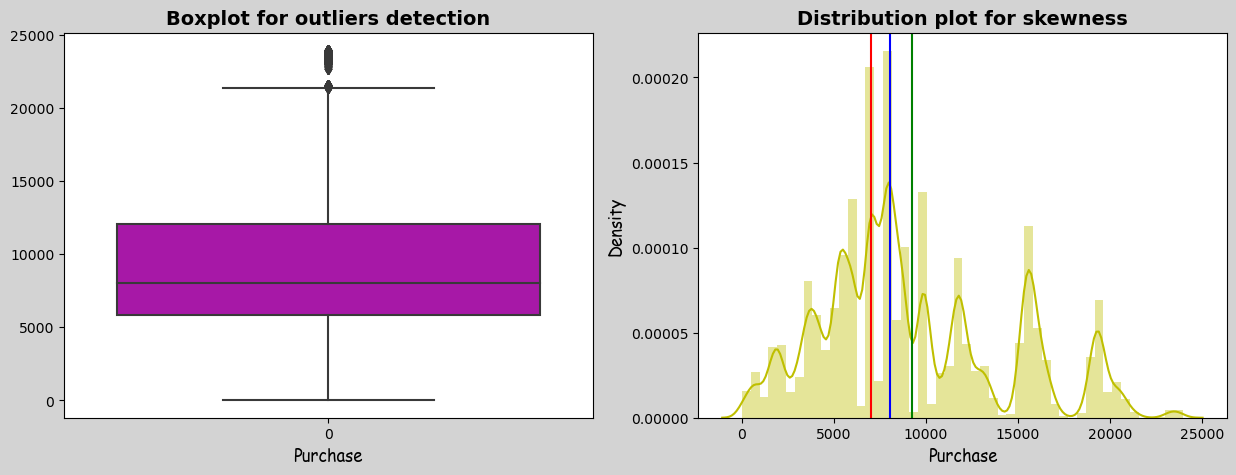

In [48]:
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(df["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.distplot(df["Purchase"],color='y')

plt.title("Distribution plot for skewness", fontweight="bold",fontsize=14)
plt.ylabel('Density', fontsize=12,family = "Comic Sans MS")
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")
plt.axvline(df["Purchase"].mean(),color="g")
plt.axvline(df["Purchase"].median(),color="b")
plt.axvline(df["Purchase"].mode()[0],color="r")

plt.show()

### Observation - 
Above graphs looks "right-skewed" which means the mass of the distribution is concentrated on the left of the figure.

Majority of Customers purchase within the 5,000 - 20,000 range.

### Outlier Treatment

In [49]:
df_1 = df.copy()

In [50]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_1['Purchase'].quantile(0.75)
Q1 = df_1['Purchase'].quantile(0.25)
IQR = Q3-Q1
df_1 = df_1[(df_1['Purchase'] > Q1 - 1.5*IQR) & (df_1['Purchase'] < Q3 + 1.5*IQR)]

C:\Users\nevashist\AppData\Local\Temp\ipykernel_30448\587554397.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Purchase"],color='y')


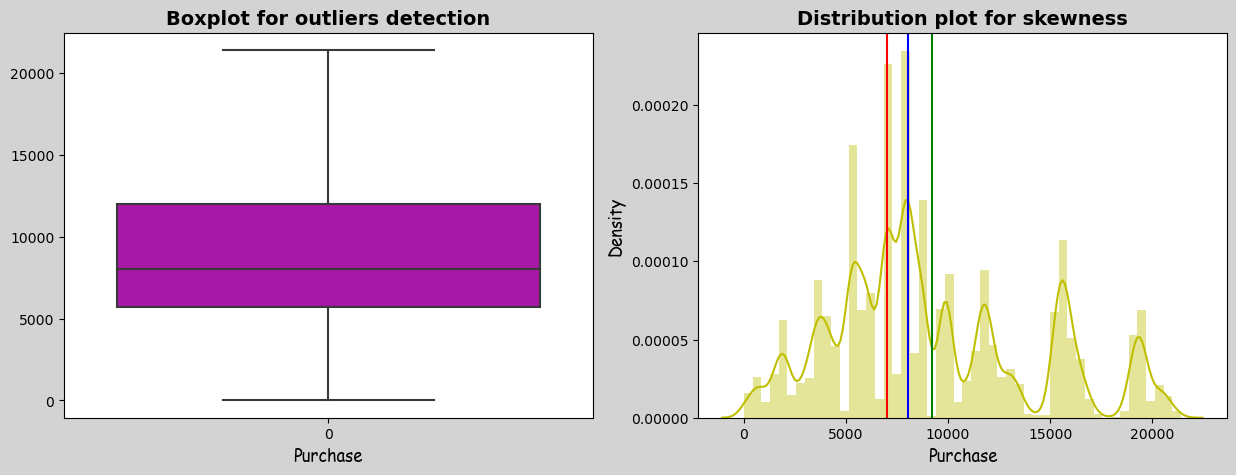

In [52]:
# Visualizing our dependent variable for Outliers and Skewness
fig = plt.figure(figsize=(15,5))
fig.set_facecolor("lightgrey")

plt.subplot(1,2,1)
sns.boxplot(df_1["Purchase"],color='m')
plt.title("Boxplot for outliers detection", fontweight="bold",fontsize=14)
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")

plt.subplot(1,2,2)
sns.distplot(df_1["Purchase"],color='y')

plt.title("Distribution plot for skewness", fontweight="bold",fontsize=14)
plt.ylabel('Density', fontsize=12,family = "Comic Sans MS")
plt.xlabel('Purchase', fontsize=12,family = "Comic Sans MS")
plt.axvline(df_1["Purchase"].mean(),color="g")
plt.axvline(df_1["Purchase"].median(),color="b")
plt.axvline(df_1["Purchase"].mode()[0],color="r")

plt.show()

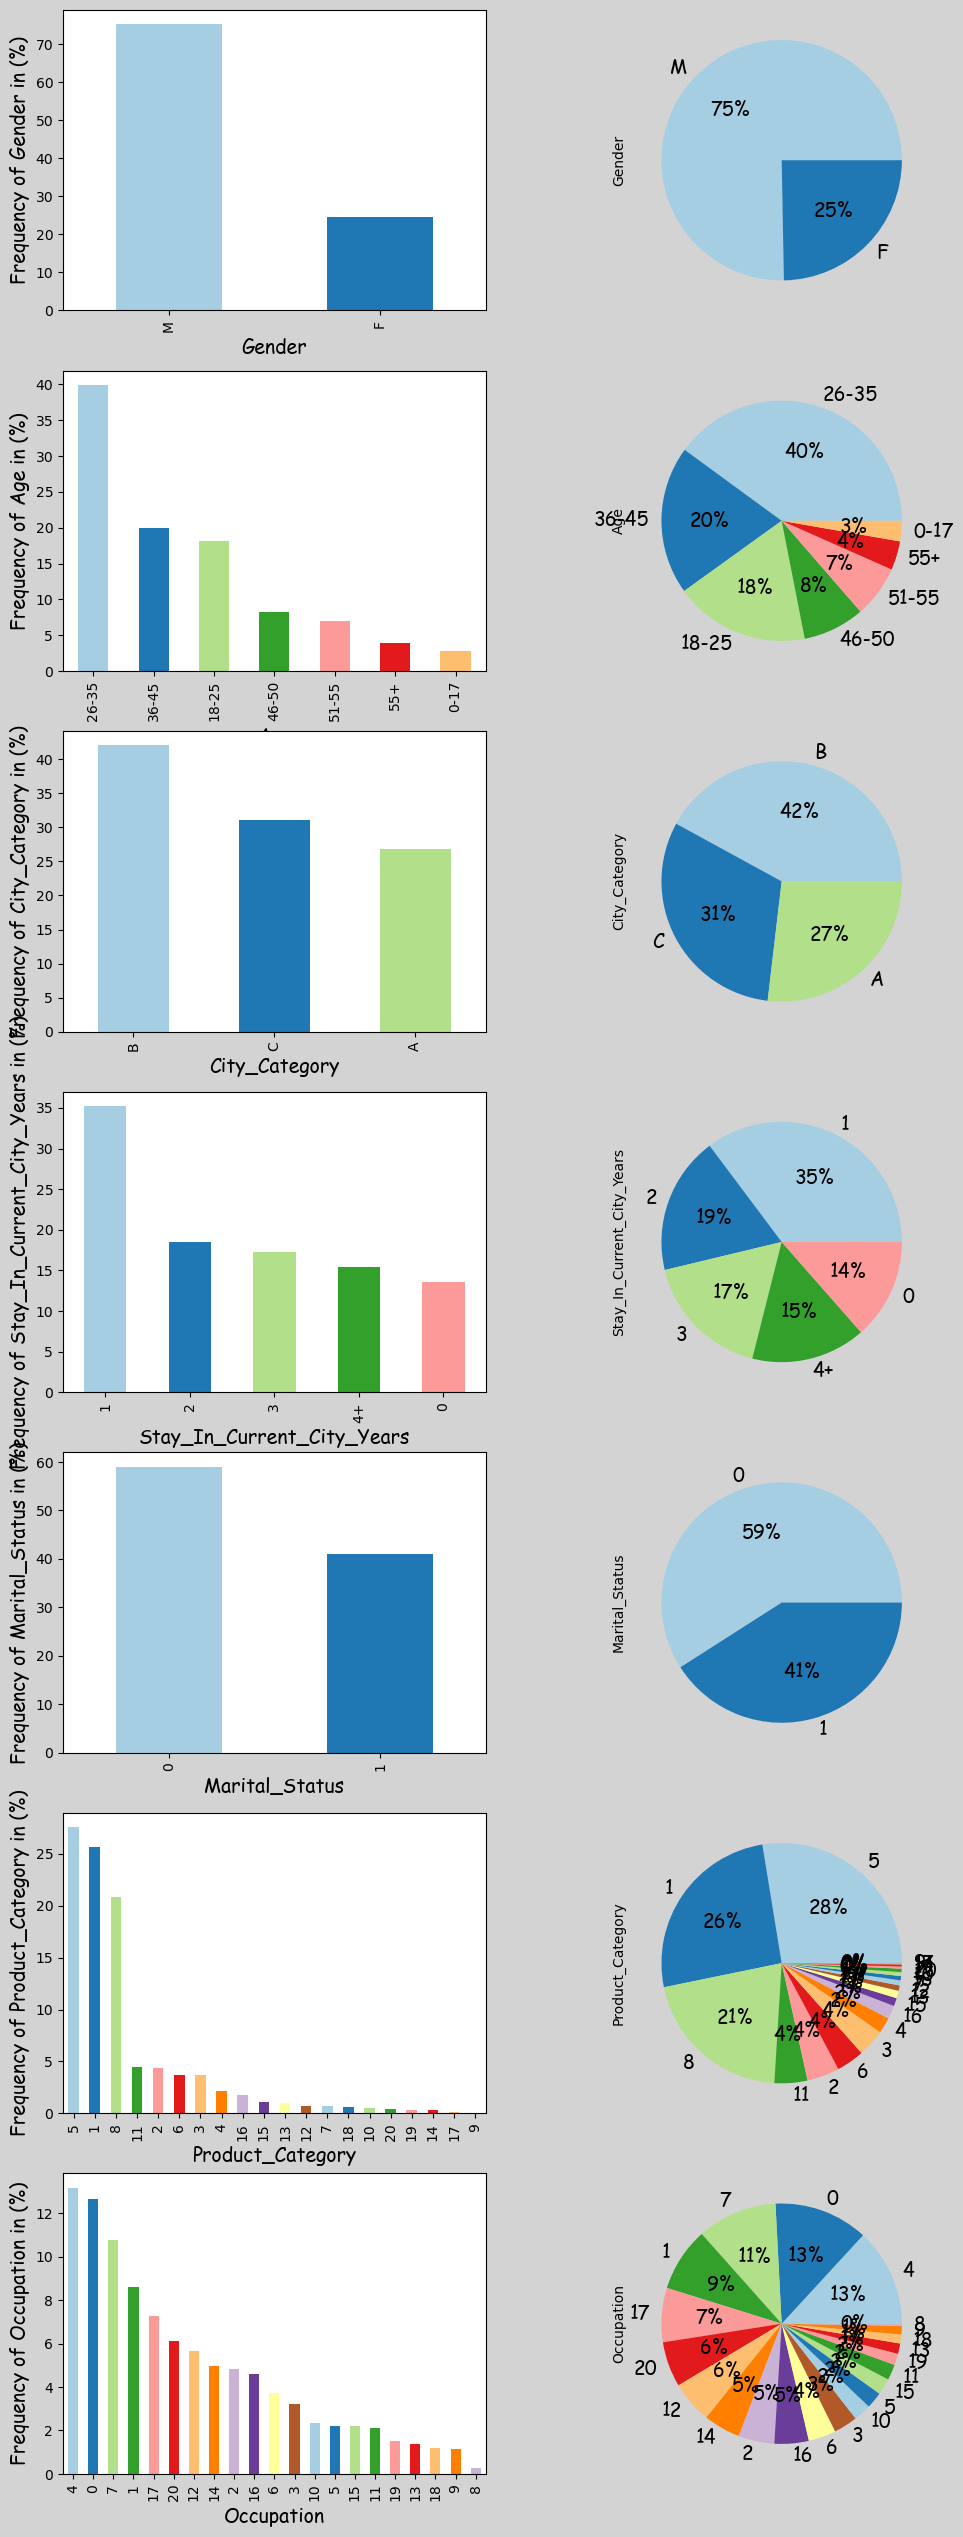

In [54]:
cat_colnames = ['Gender','Age','City_Category','Stay_In_Current_City_Years',
                'Marital_Status','Product_Category', 'Occupation']
cat_analysis(df_1,cat_colnames,7,2,12,32)

### Observation - 
1. Males clearly purchase more than females. 75% of men and only 25% of women purchase products.

2. 60% of purchases are made by people between the ages of 26 and 45

3. City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.

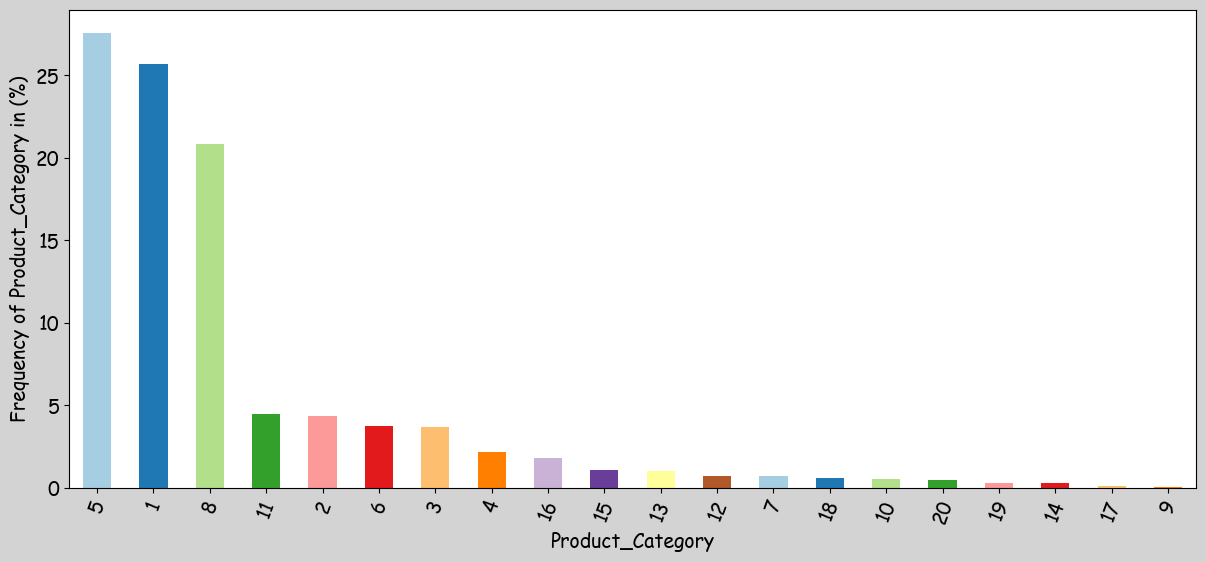

In [55]:
bar_plot_percentage(df_1,['Product_Category'])

### Observation - 
Product Category 5,1 & 8 are the products that customers buy the most.

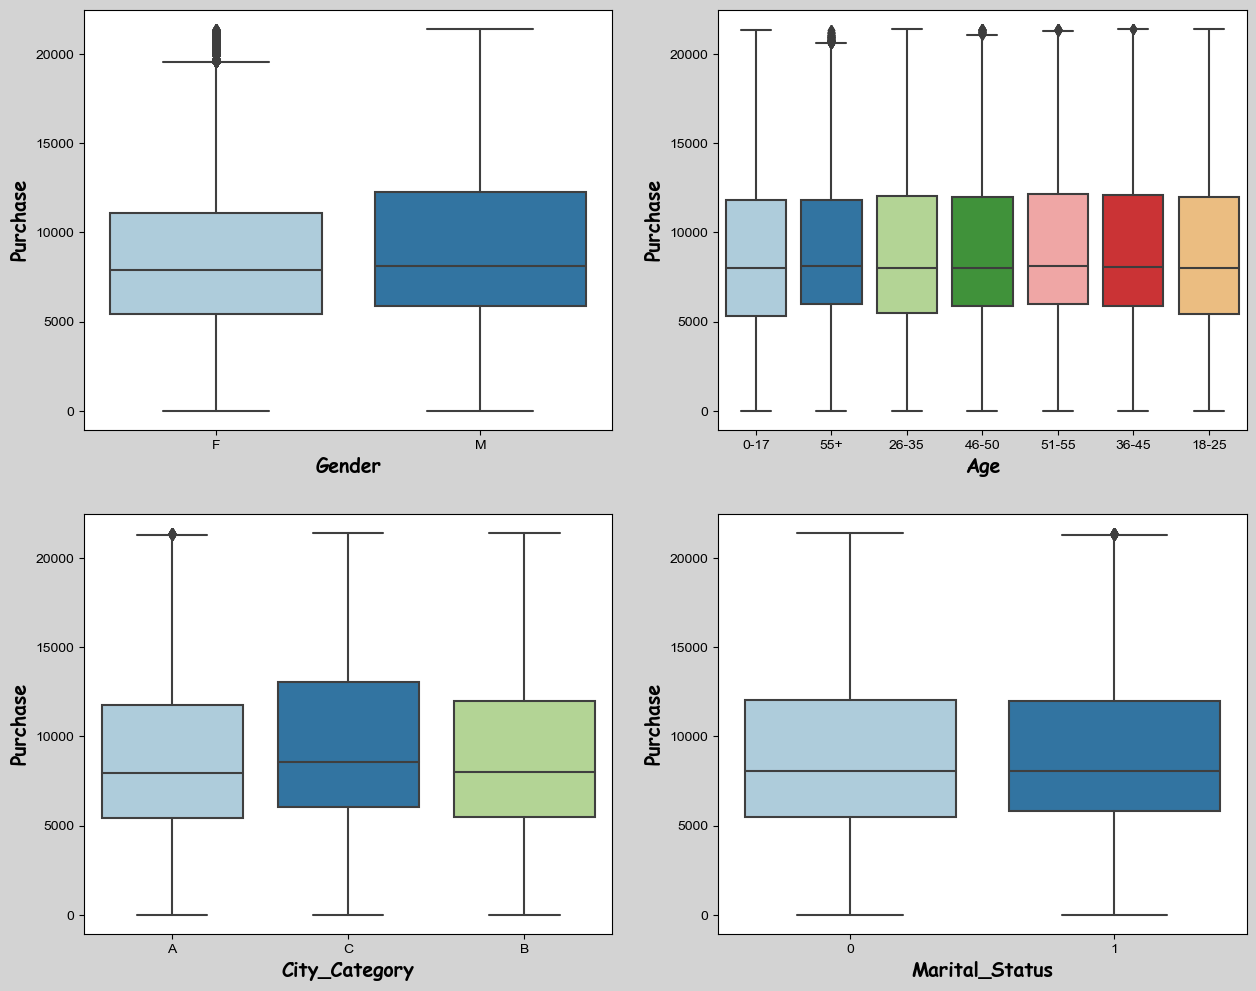

In [56]:
col_cat = ['Gender', 'Age','City_Category','Marital_Status']
num_cat_bi(df_1,col_cat,'Purchase',2,2,15,12)

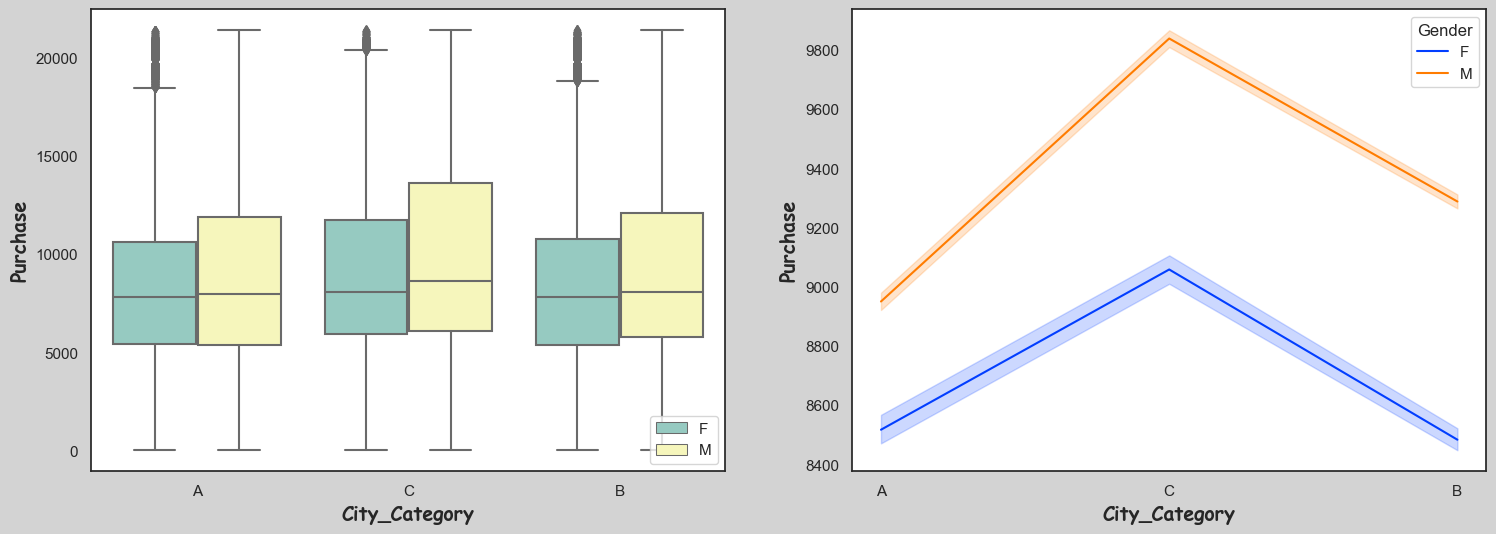

In [57]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_1,col_num,"City_Category",'Gender')

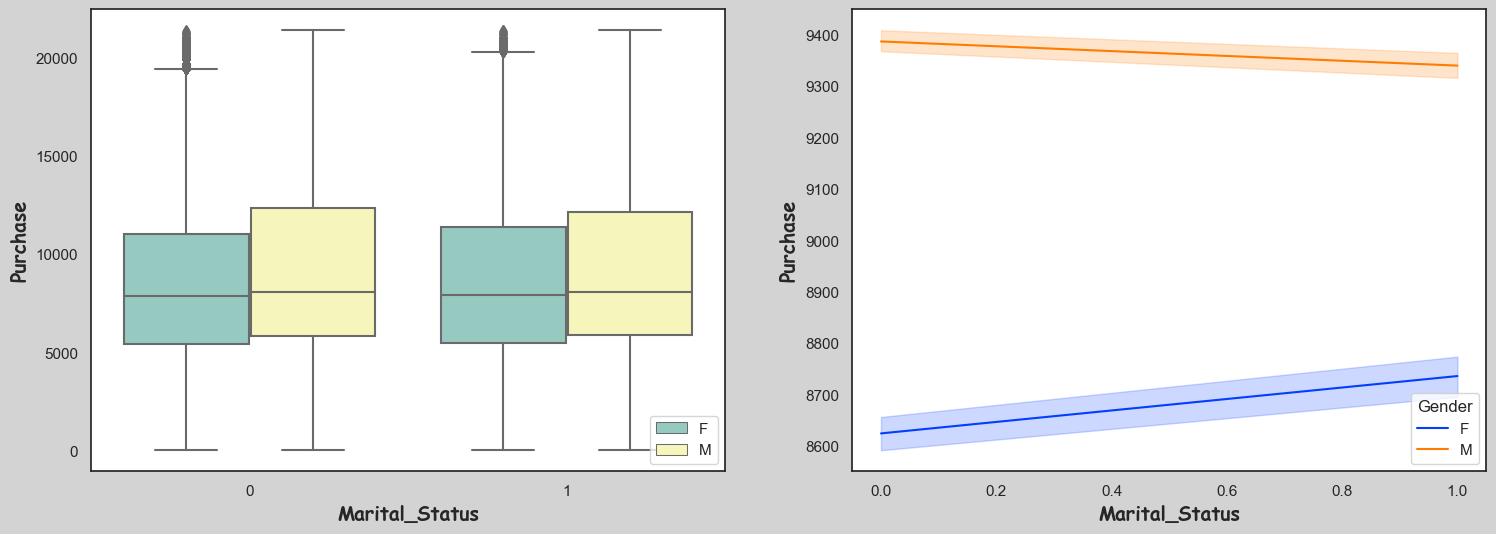

In [58]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_1,col_num,"Marital_Status",'Gender')

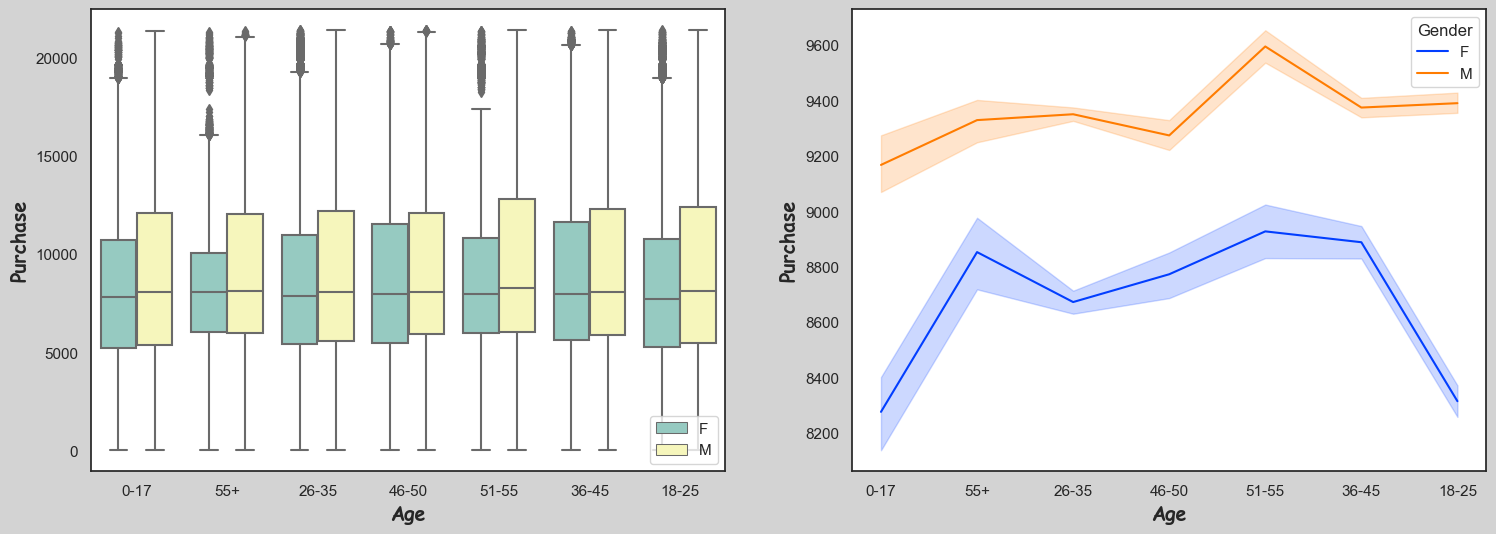

In [59]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_1,col_num,"Age",'Gender')

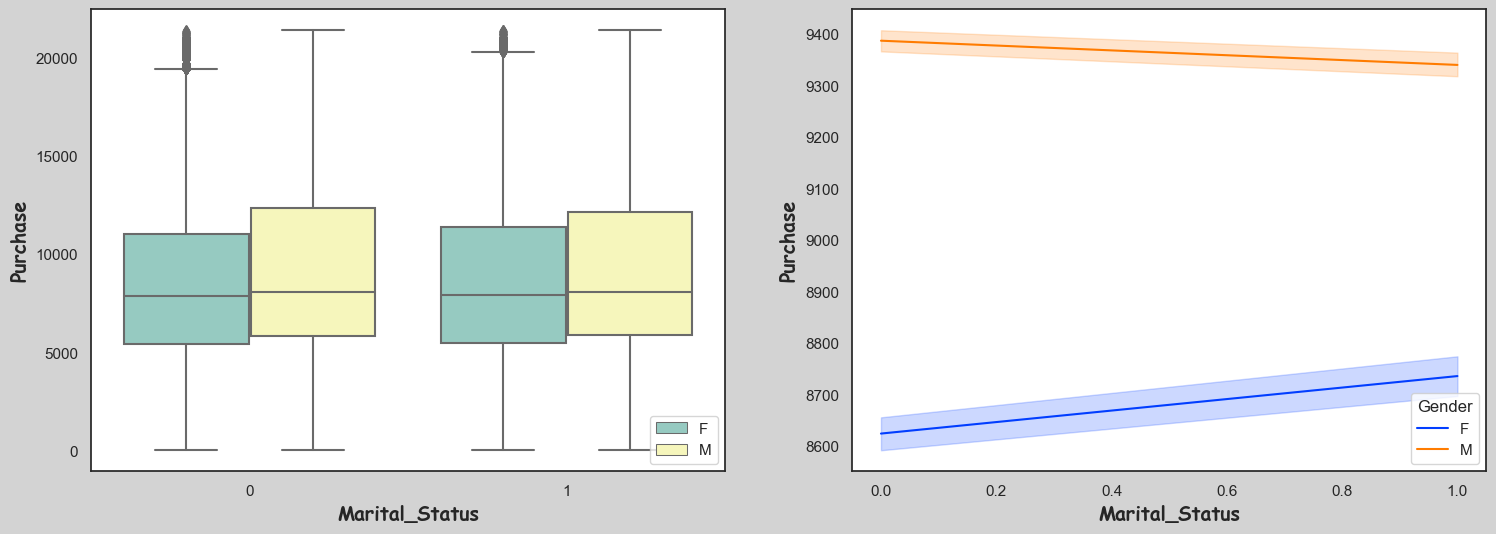

In [60]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_1,col_num,"Marital_Status",'Gender')

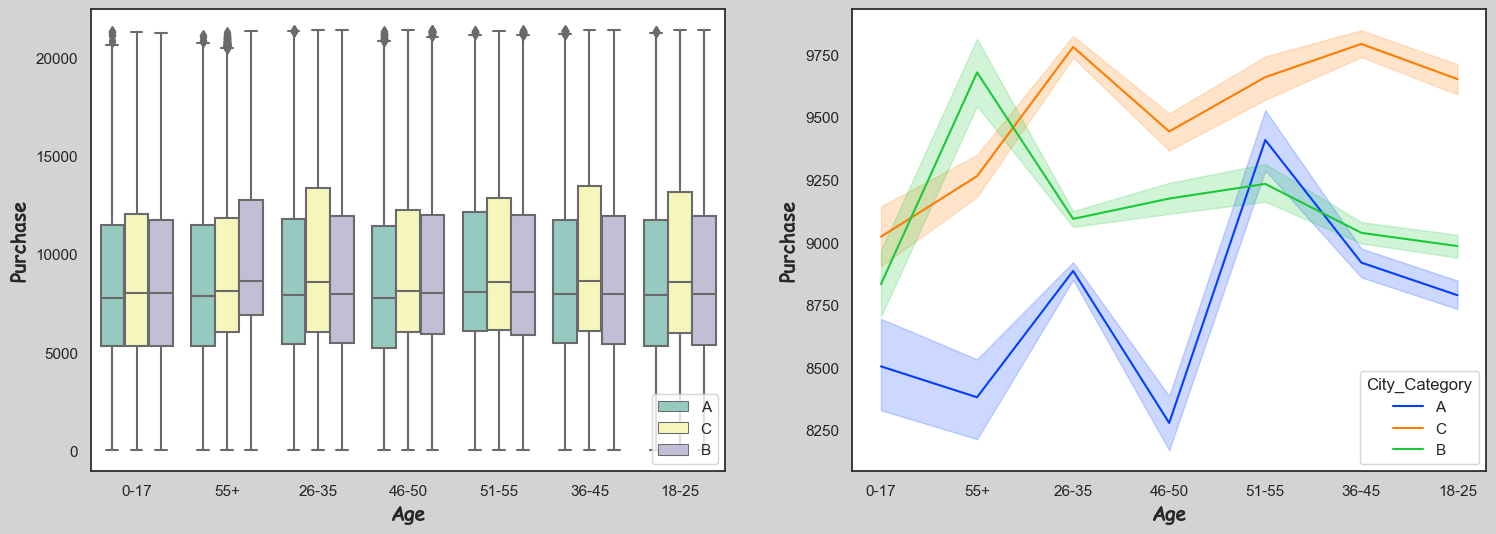

In [61]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_1,col_num,"Age",'City_Category')

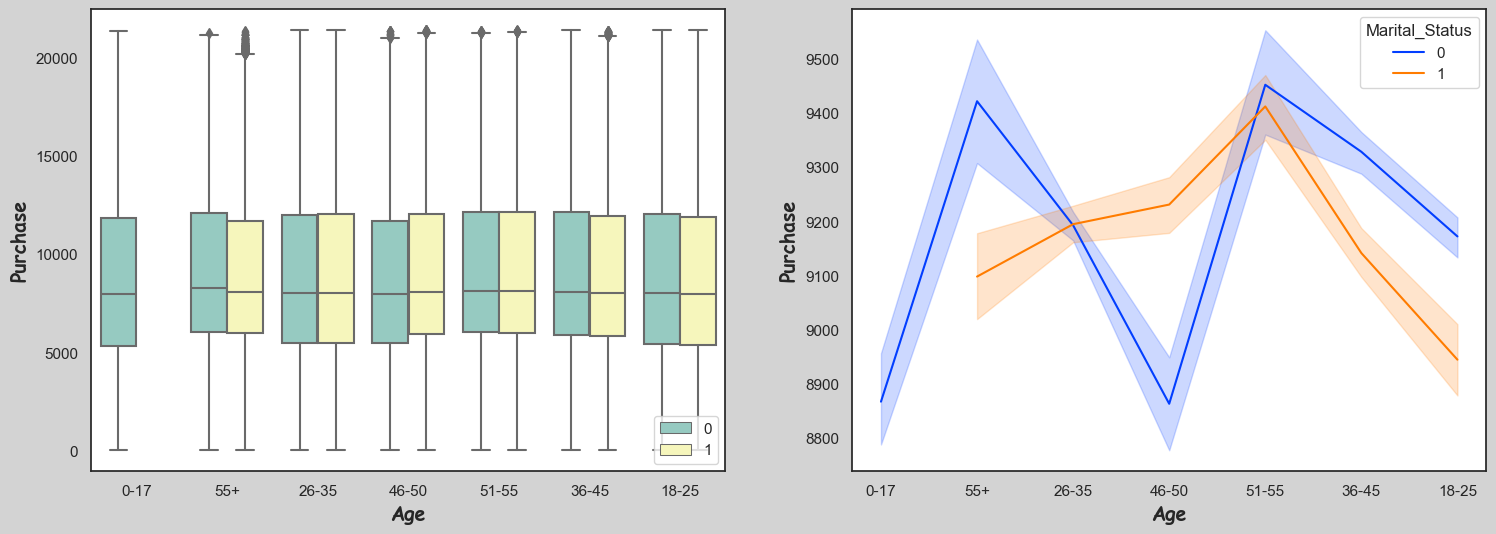

In [62]:
col_num = [ 'Purchase']
num_cat_bi_grpby(df_1,col_num,"Age",'Marital_Status')

### Observations - 
1. Purchases are high in city category C

2. Purchase is the same for all age groups

3. Most of the customers are 55+ and live in city category B

4. City category C has more customers between the ages of 18 and 45.

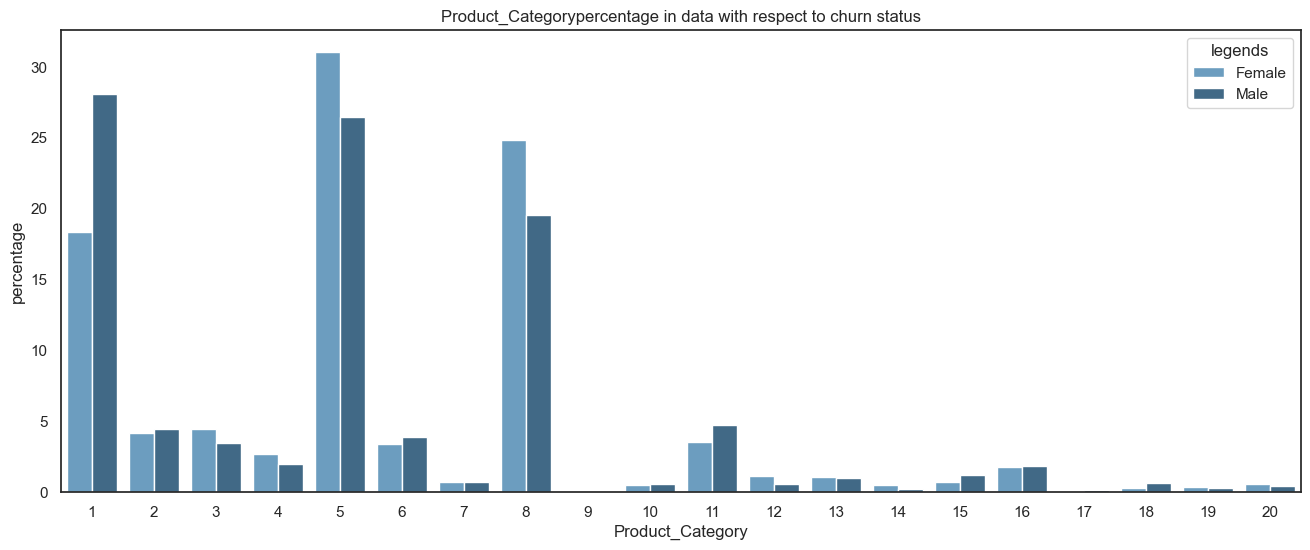

In [69]:
bar_M_vs_F('Product_Category')

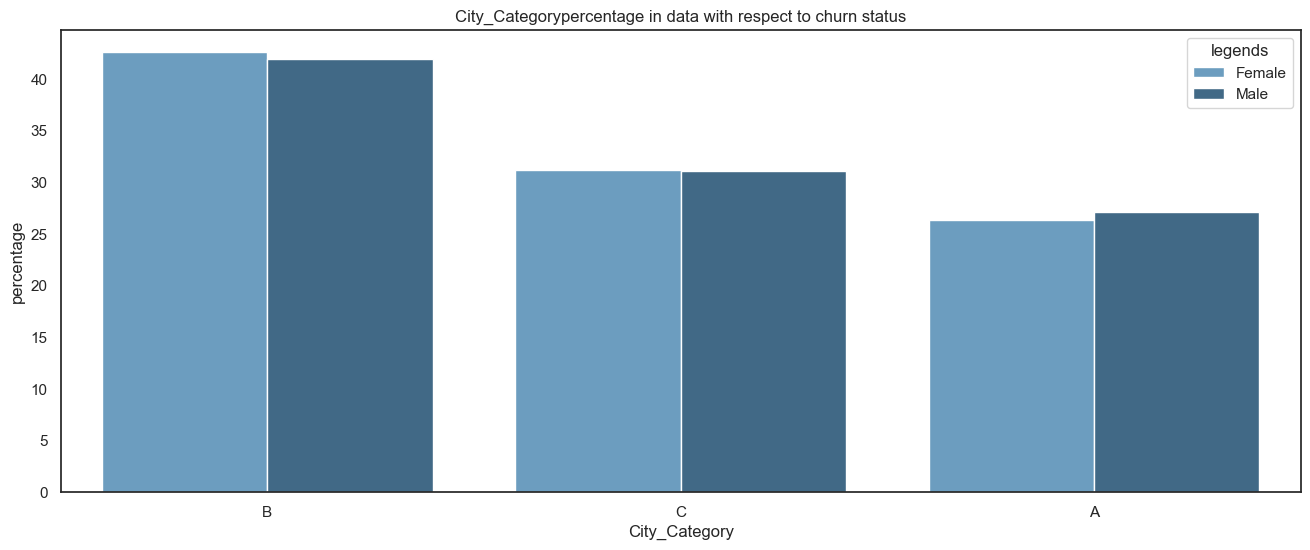

In [70]:
bar_M_vs_F('City_Category')

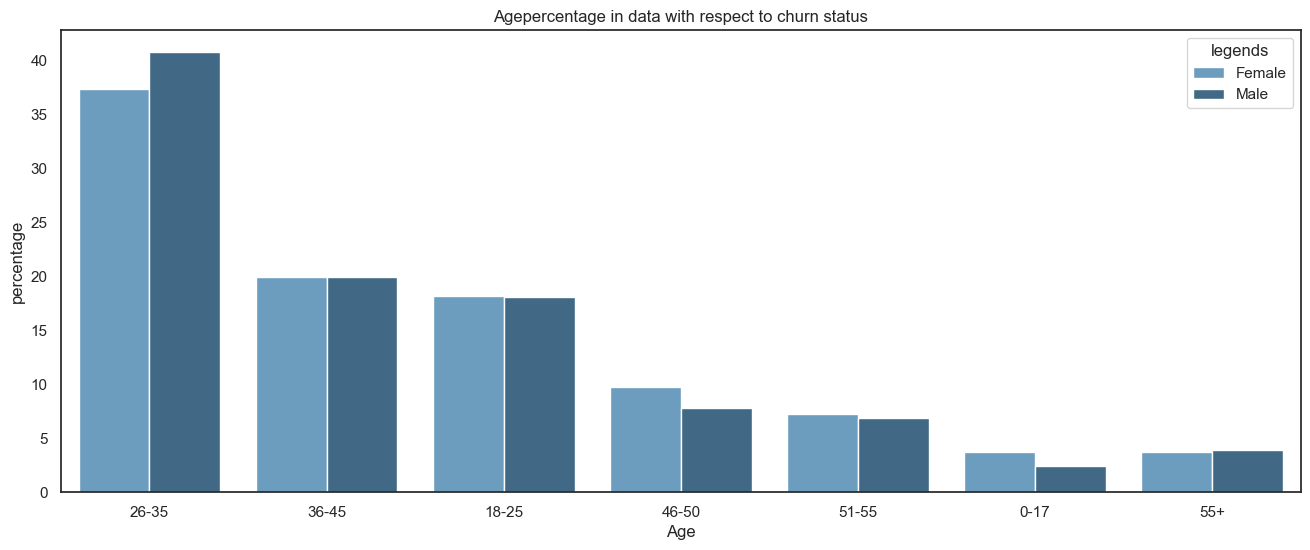

In [71]:
bar_M_vs_F('Age')

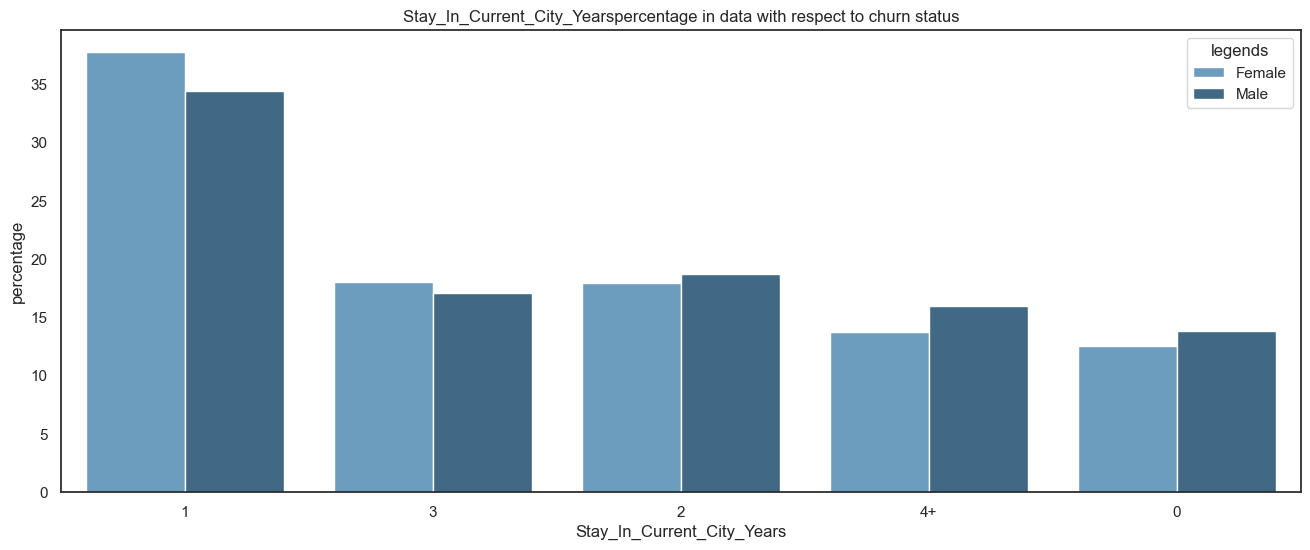

In [72]:
bar_M_vs_F('Stay_In_Current_City_Years')

### Observation - 
1. Product 5 and 8 is common among females.

2. In City Category C, there are slightly more female customers.

In [73]:
print(df_1.groupby(['Gender','City_Category'])['User_ID'].count())

Gender  City_Category
F       A                 35552
        B                 57572
        C                 42096
M       A                111484
        B                172542
        C                128145
Name: User_ID, dtype: int64


<Figure size 2500x1000 with 0 Axes>

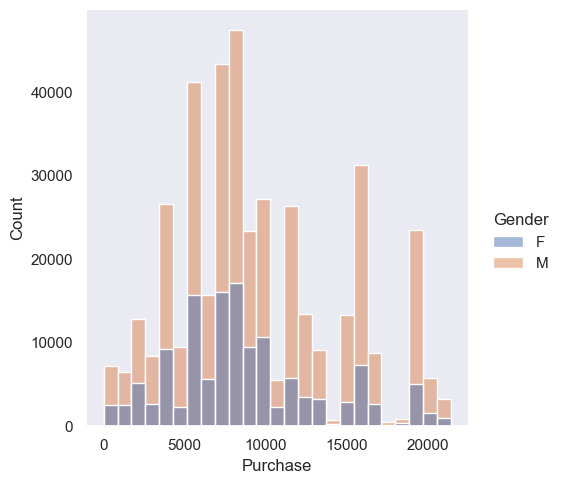

In [75]:
fig = plt.figure(figsize=(25,10))
fig.set_facecolor("lightgrey")
sns.set(style='dark')
sns.displot(x= 'Purchase',data=df_1,hue='Gender',bins=25)
plt.show()

### Observation - The amount of money spent by women is less than that spent by men

In [76]:
df_1.sample(500,replace=True).groupby(['Gender'])['Purchase'].describe()

count         mean          std    min      25%     50%       75%  \
Gender                                                                      
F       130.0  8420.353846  4197.369091  590.0  5469.00  7909.5  11035.75   
M       370.0  9143.924324  4978.423752   12.0  5635.25  8078.5  11867.25   

            max  
Gender           
F       20498.0  
M       21178.0

#### Observation - Even the sample mean shows that males spend more than females.

In [77]:
df_1.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135220.0  8671.049039  4679.058483  12.0  5429.0  7906.0  11064.0   
M       412171.0  9367.724355  5009.234088  12.0  5852.0  8089.0  12247.0   

            max  
Gender           
F       21398.0  
M       21399.0

### Observation- 
Given the sample size of 5.4 Million data for customer purhase history with 1.3M Females and 4.1 Males

In [78]:
retail_data_smp_male = df_1[df_1['Gender'] == 'M']['Purchase']
retail_data_smp_female = df_1[df_1['Gender'] == 'F']['Purchase']

In [79]:
print("Male Customers : ",retail_data_smp_male.shape[0])
print("Female Customers : ",retail_data_smp_female.shape[0])

Male Customers :  412171
Female Customers :  135220


### Central Limit Theorem

##### Assumptions - 
Randomization: The data must be sampled randomly such that every member in a population has an equal probability of being selected to be in the sample.

Independence: The sample values must be independent of each other.

The 10% Condition: When the sample is drawn without replacement, the sample size should be no larger than 10% of the population.

Large Sample Condition: The sample size needs to be sufficiently large.


###### Calculate CI using Bootstrapping
We will be using Bootstrapping method to estimate the confidence interval of the population mean of the expenses by female and Male customers.

### Bootstrapping
Bootstrapping is a method that can be used to estimate the standard error of any statistic and produce a confidence interval for the statistic.

##### The basic process for bootstrapping is as follows:

1. Take k repeated samples with replacement from a given dataset.
2. For each sample, calculate the statistic you’re interested in.
3. This results in k different estimates for a given statistic, which you can then use to calculate the standard error of the statistic and create a confidence interval for the statistic.

##### Calculate z-critical
1. Calculate the significance level : alpha = (1 - confidence interval)/ number of tails

2. Z-Table lookup value is (1 - α )

3. Find the y-axis value, then the x-axis value

4. Critical value = y-axis value + x-axis value

### CLT Analysis for mean purchase with confidence 90% - Based on Gender
Analysis of the true mean of purchase values by gender with a 90% confidence

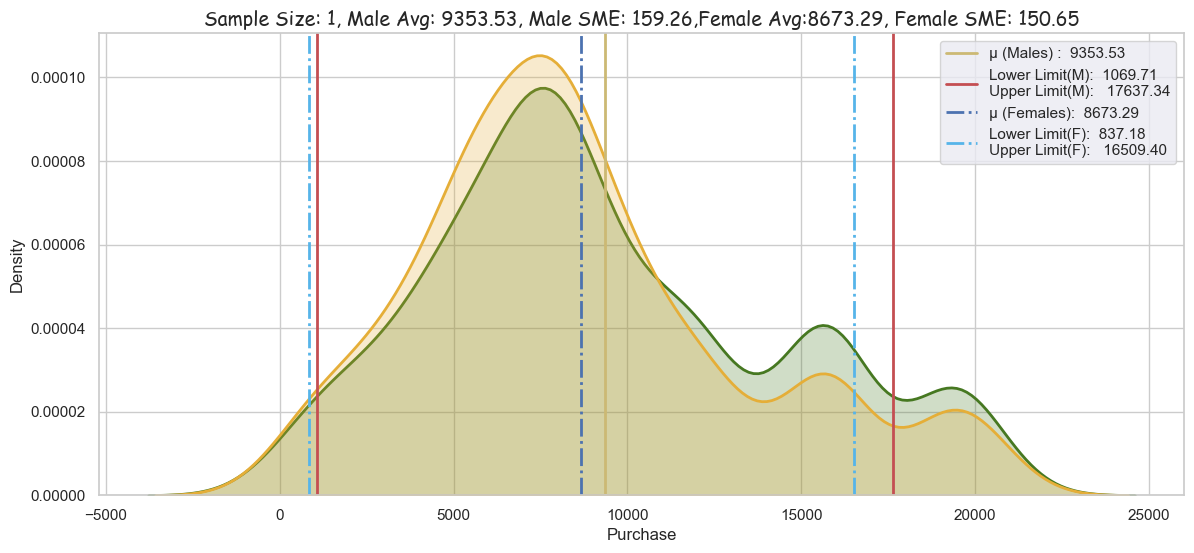

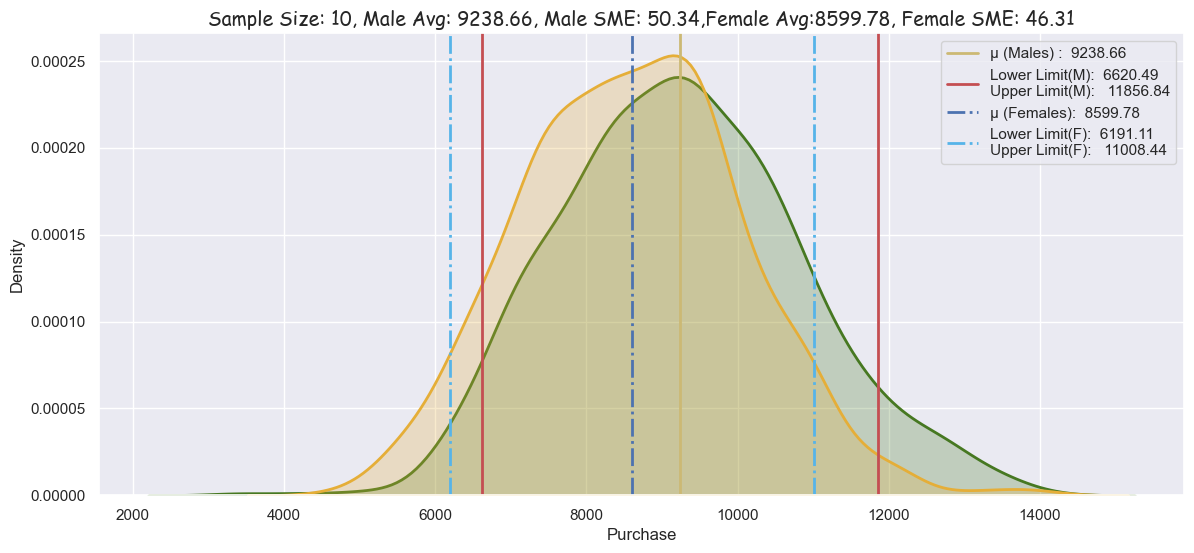

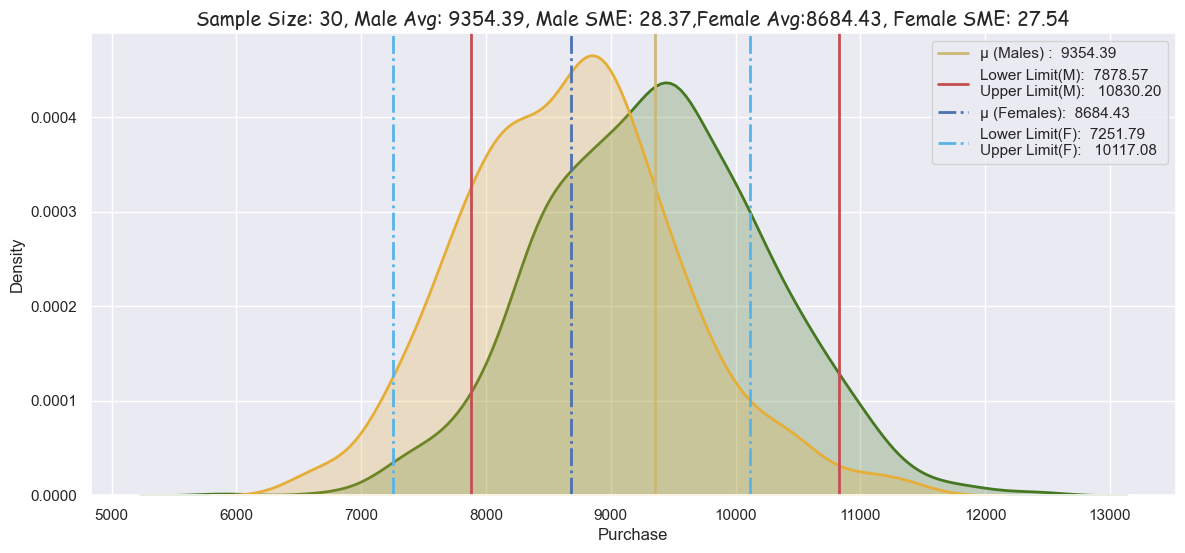

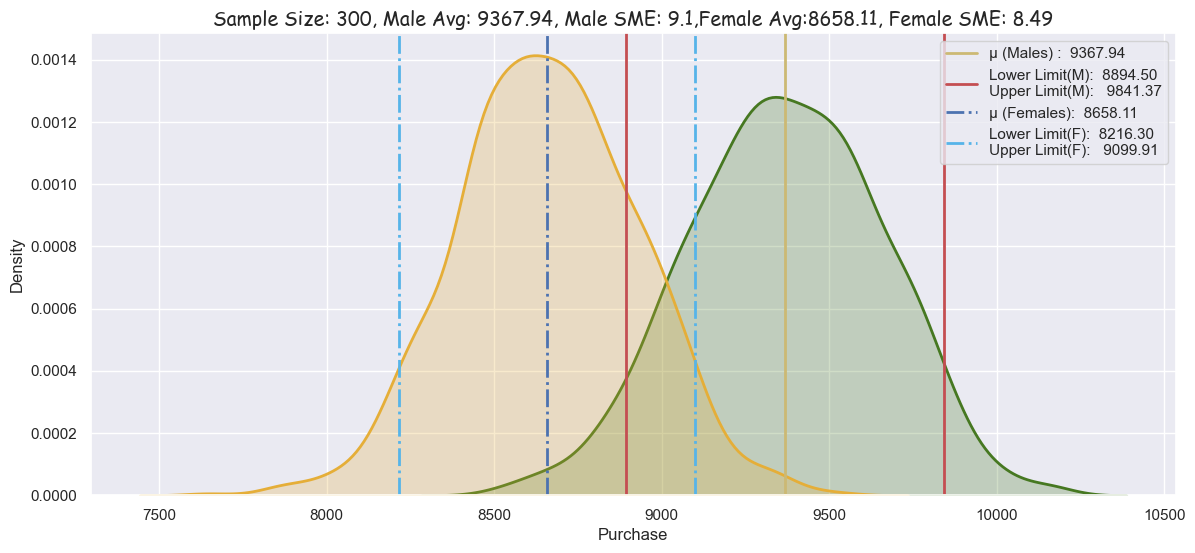

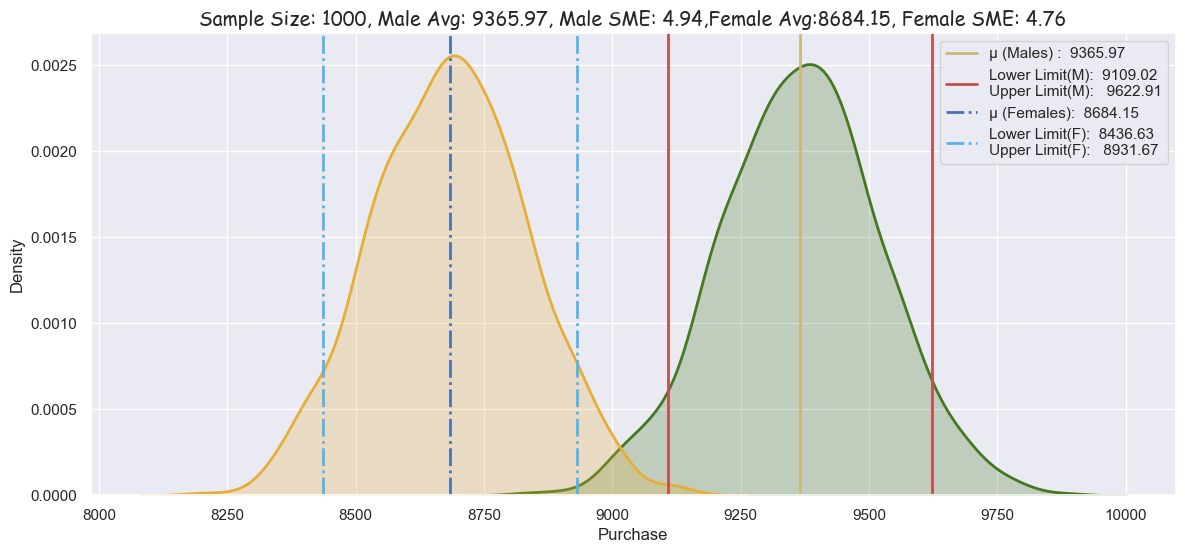

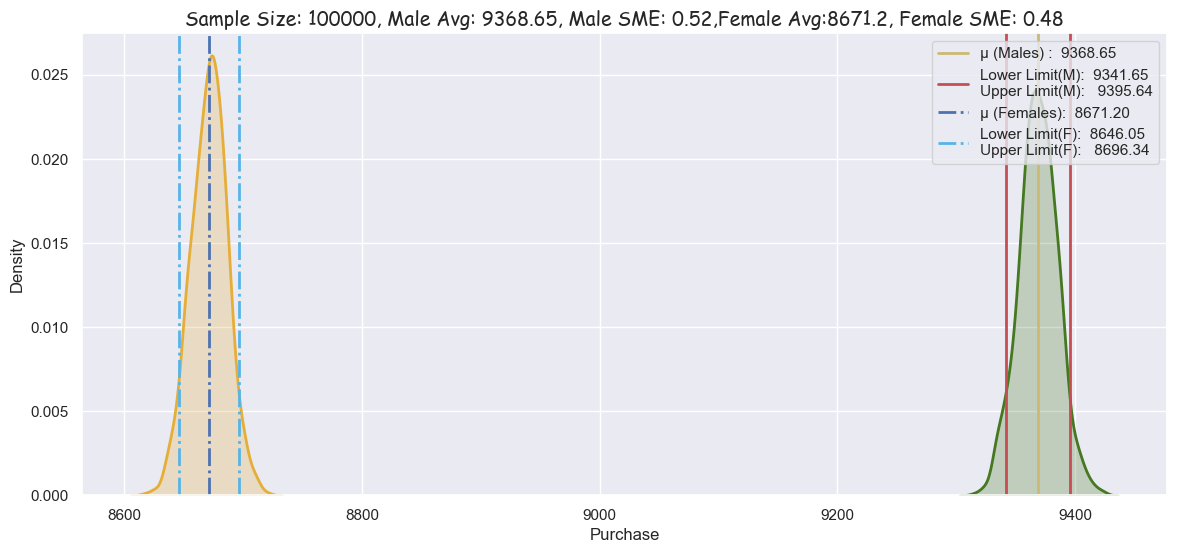

In [82]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.90

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),90]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),90]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])
print()


In [83]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
6       M      8894.5     9841.37         300   [8894.5, 9841.37]  946.87   
8       M     9109.02     9622.91        1000  [9109.02, 9622.91]  513.89   
10      M     9341.65     9395.64      100000  [9341.65, 9395.64]   53.99   

   Confidence_pct  
6              90  
8              90  
10             90

In [84]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI   Range  \
7       F      8216.3     9099.91         300   [8216.3, 9099.91]  883.61   
9       F     8436.63     8931.67        1000  [8436.63, 8931.67]  495.04   
11      F     8646.05     8696.34      100000  [8646.05, 8696.34]   50.29   

   Confidence_pct  
7              90  
9              90  
11             90

### Observations - 
1. As the sample size increases, the two groups start to become distinct

2. With increasing sample size, Standard error of the mean in the samples decreases.

3. For sample size 100000 is 0.49

4. For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8645.68, 8696.14]

5. For Male range for mean purchase with confidence interval 90% is [9341.03, 9393.94]

### CLT Analysis for mean purchase with confidence 95% - Based on Gender

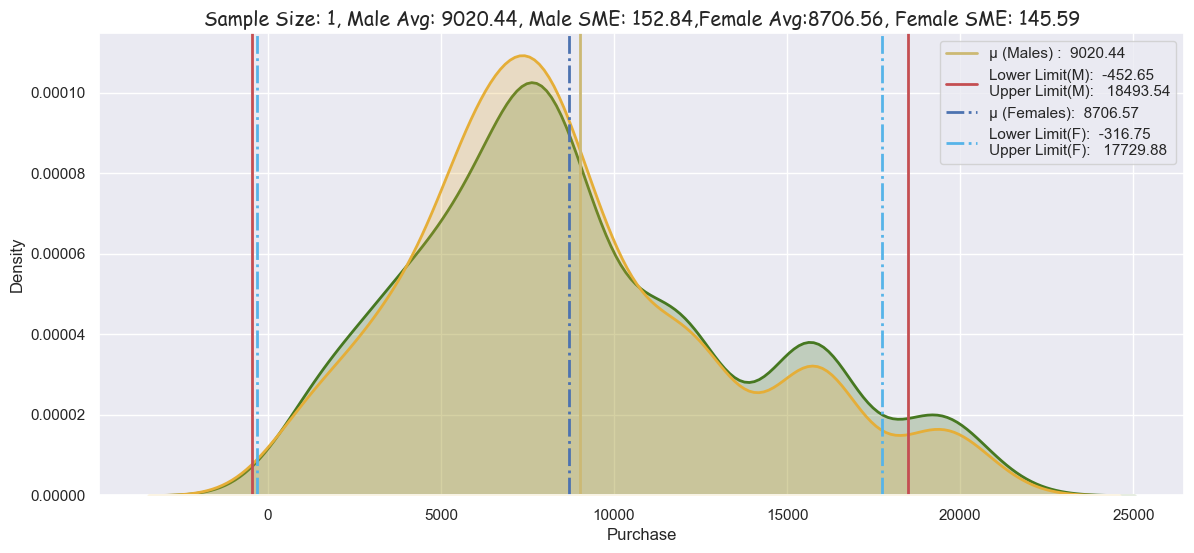

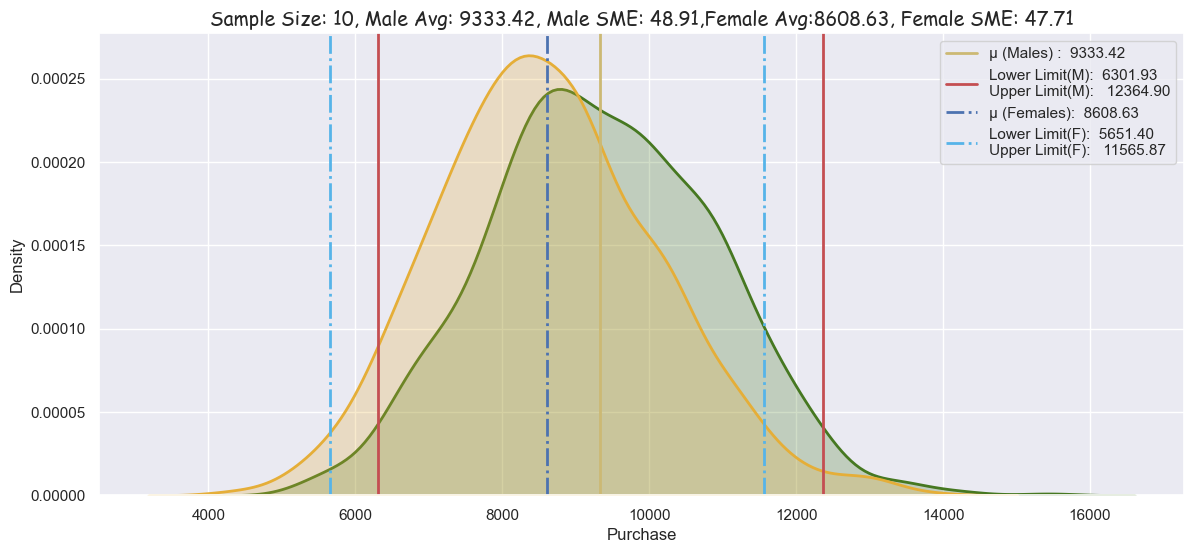

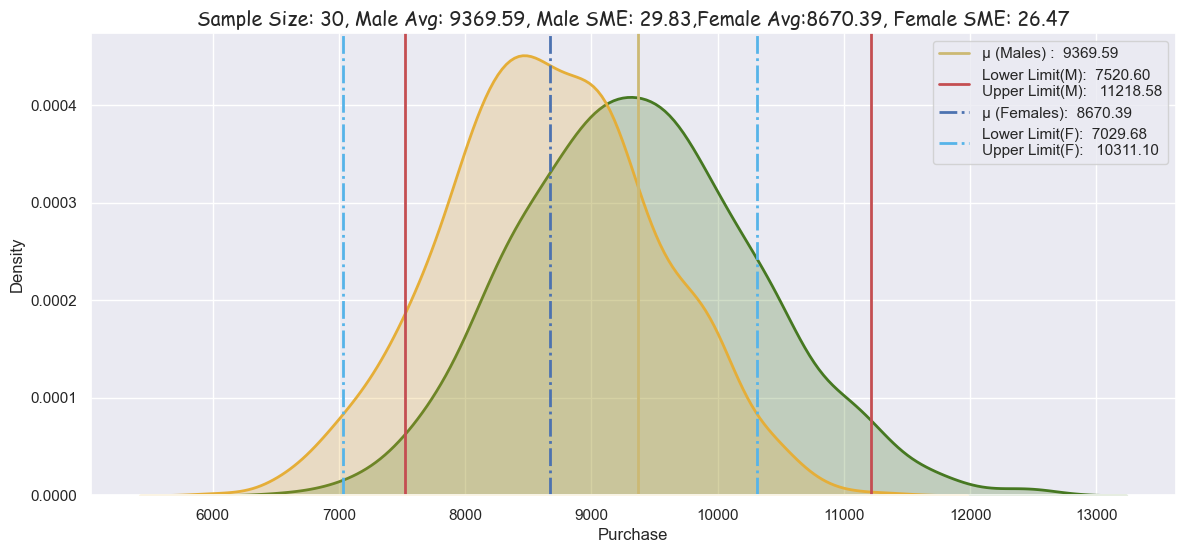

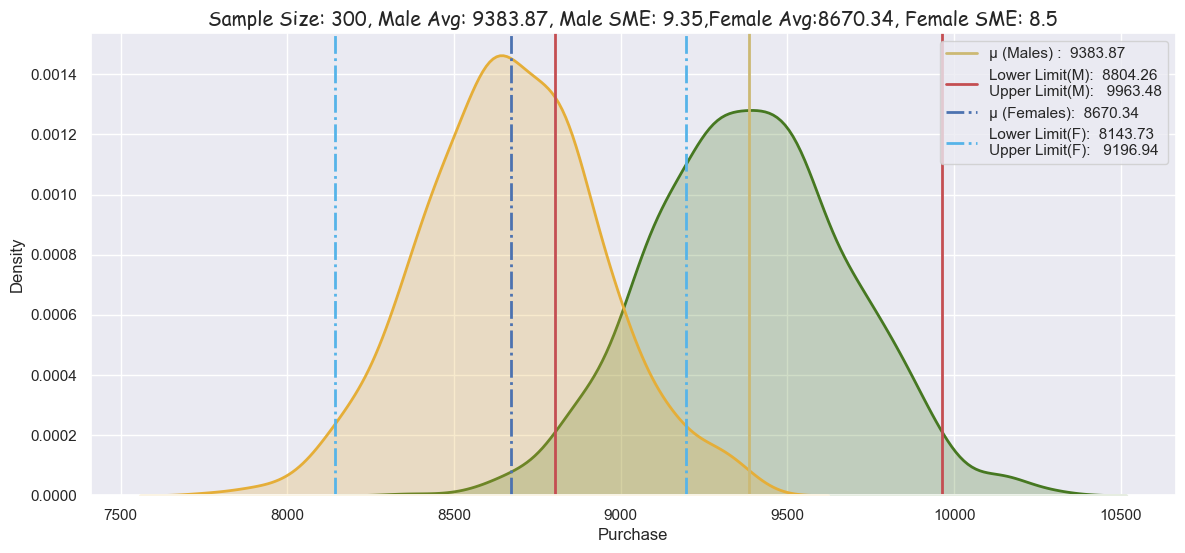

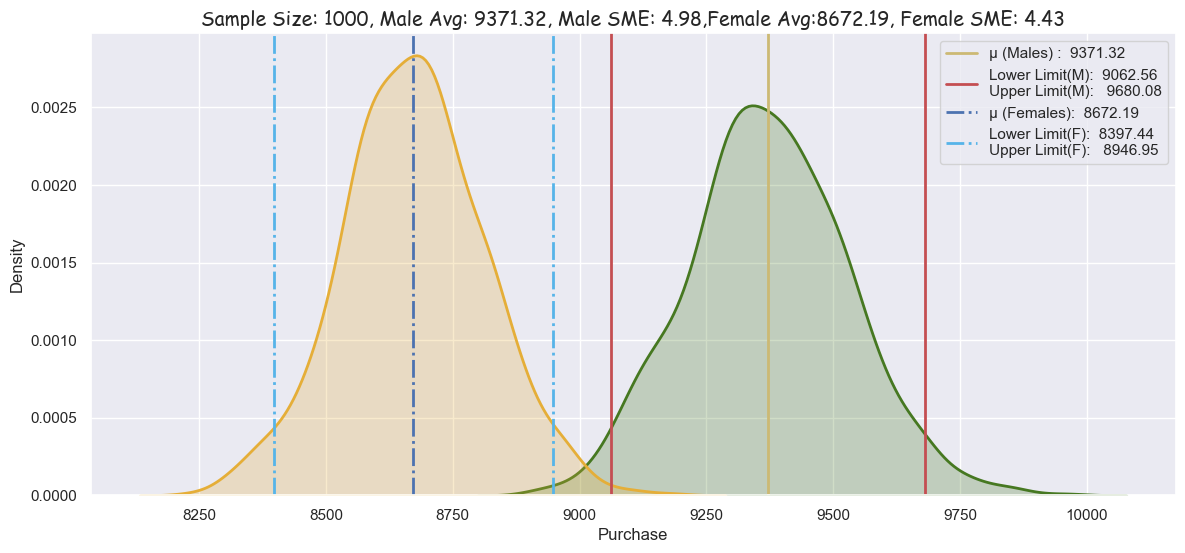

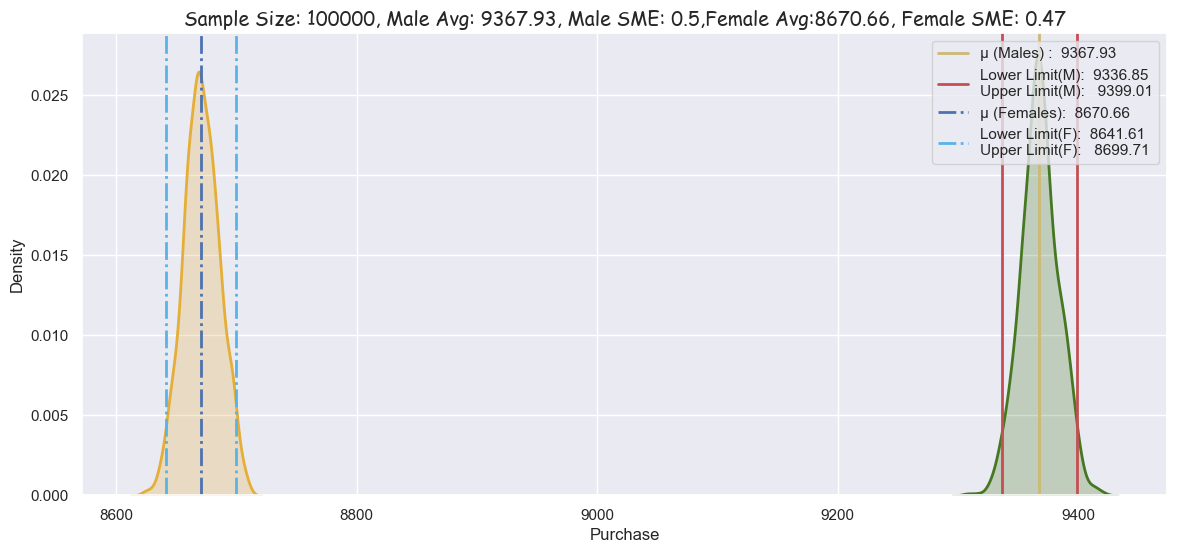

In [85]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.95

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),95]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),95]]), axis=0)

overlap_95 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit',
                                            'Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_95], axis=0)

In [86]:
overlap_95.loc[(overlap_95['Gender'] == 'M') & (overlap_95['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
6       M     8804.26     9963.48         300  [8804.26, 9963.48]  1159.22   
8       M     9062.56     9680.08        1000  [9062.56, 9680.08]   617.52   
10      M     9336.85     9399.01      100000  [9336.85, 9399.01]    62.16   

   Confidence_pct  
6              95  
8              95  
10             95

In [87]:
overlap_95.loc[(overlap_95['Gender'] == 'F') & (overlap_95['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
7       F     8143.73     9196.94         300  [8143.73, 9196.94]  1053.21   
9       F     8397.44     8946.95        1000  [8397.44, 8946.95]   549.51   
11      F     8641.61     8699.71      100000  [8641.61, 8699.71]     58.1   

   Confidence_pct  
7              95  
9              95  
11             95

### Observations - 
1. Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%-

2. As the sample size increases, the Male and female groups start to become distinct

3. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.47

4. For Female (sample size 100000) range for mean purchase with confidence interval 90% is [8642.58, 8701.58]

5. For Male range for mean purchase with confidence interval 95% is [9336.23, 9397.53]

6. Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

### CLT Analysis for mean purchase with confidence 99% - Based on Gender

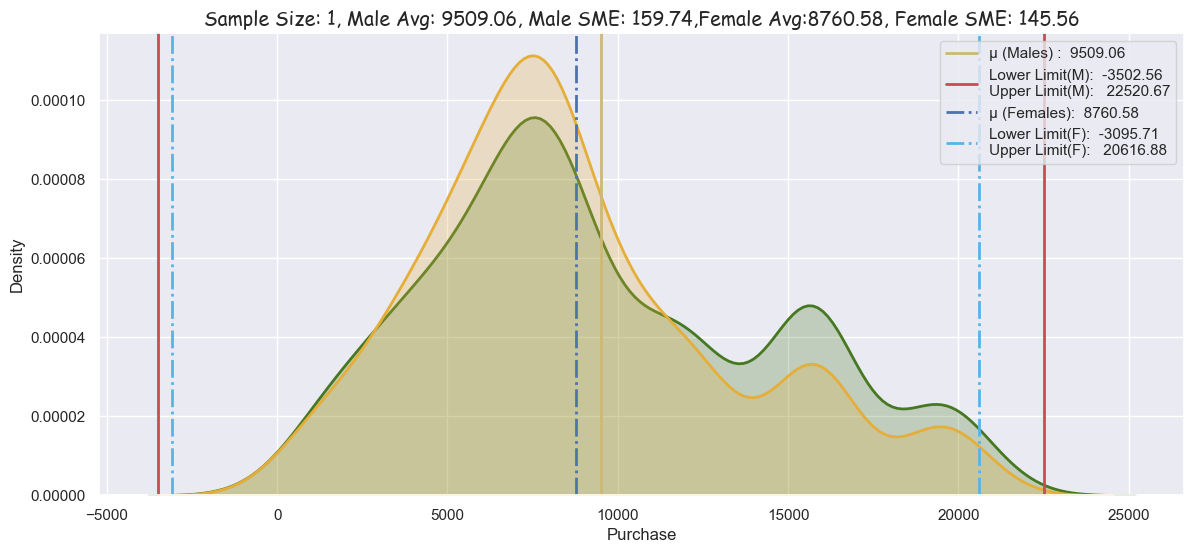

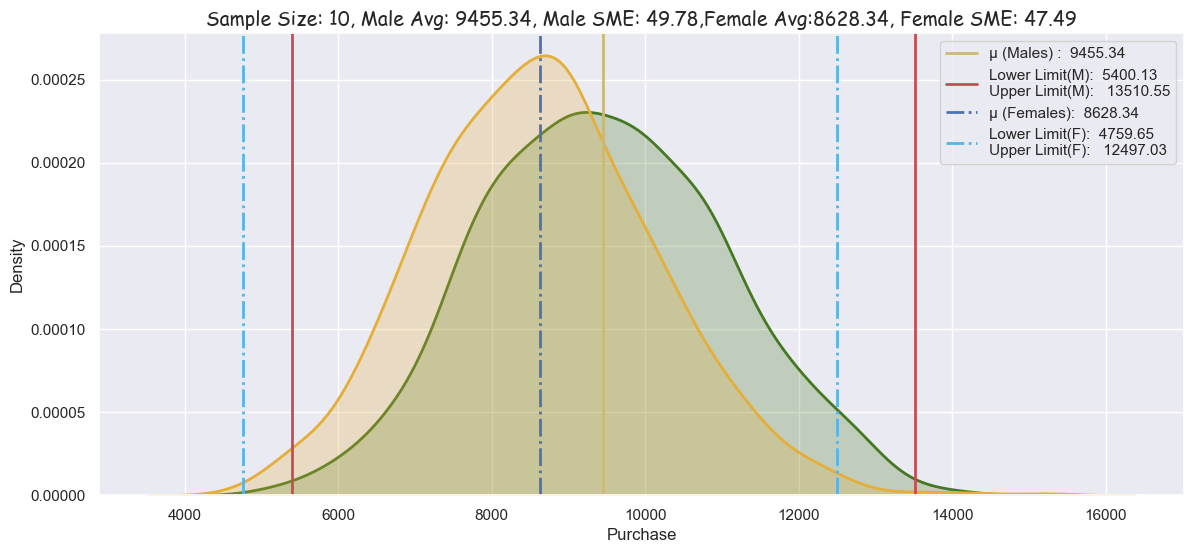

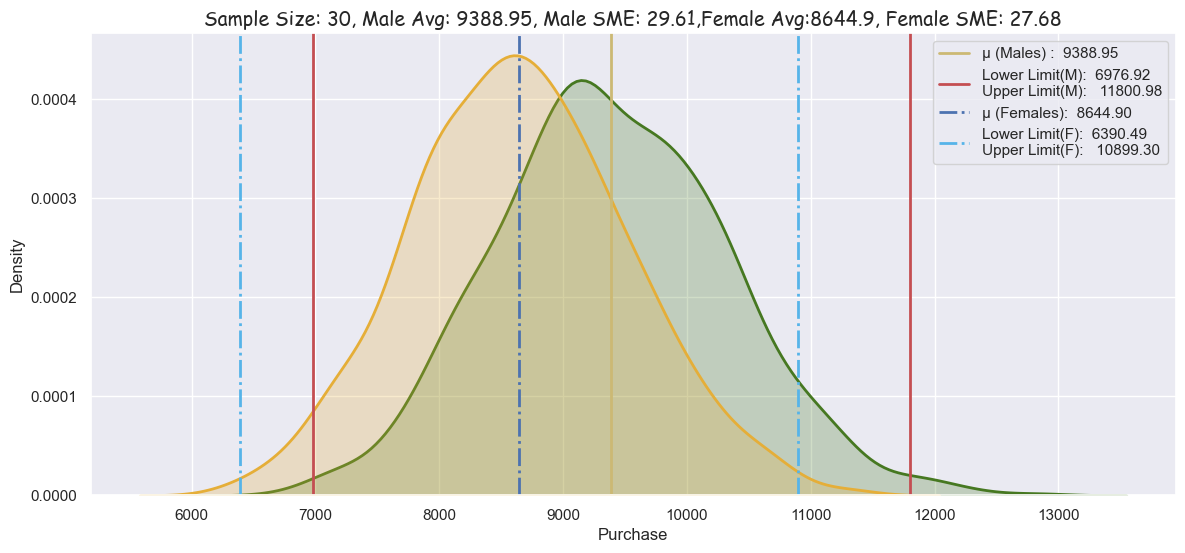

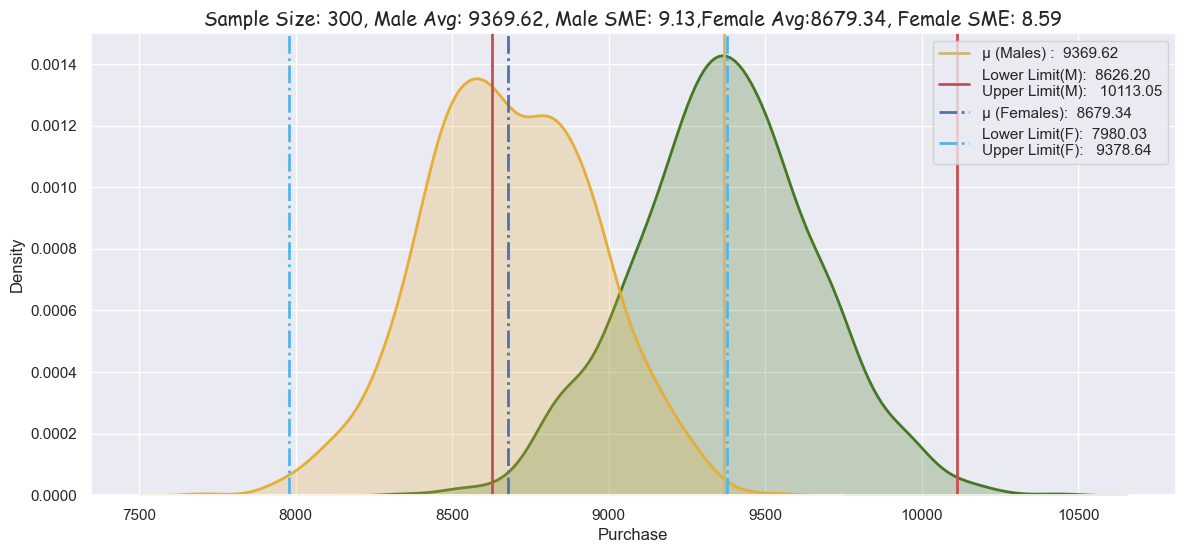

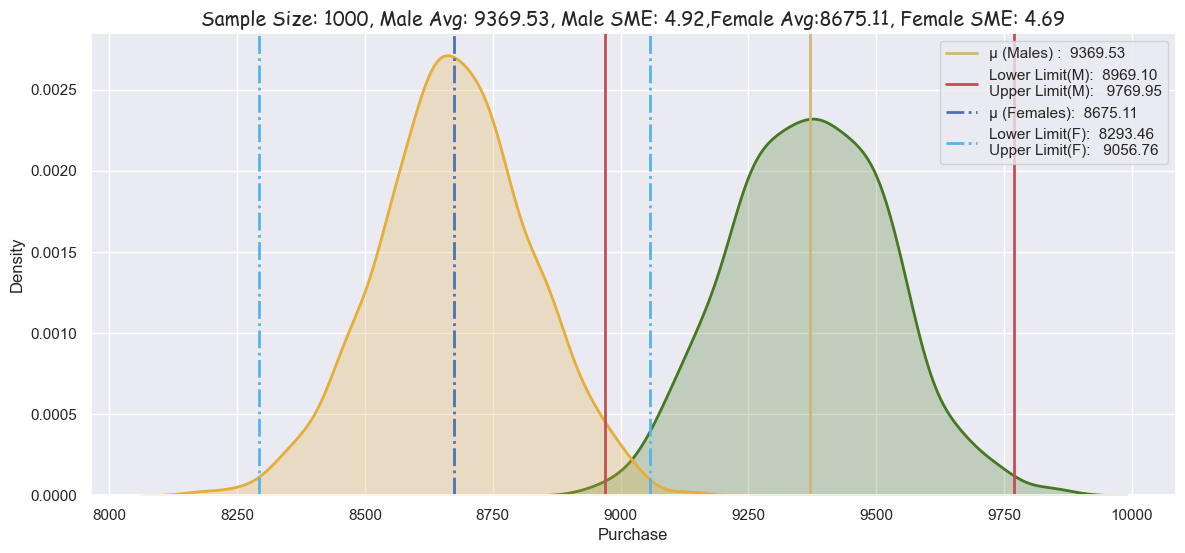

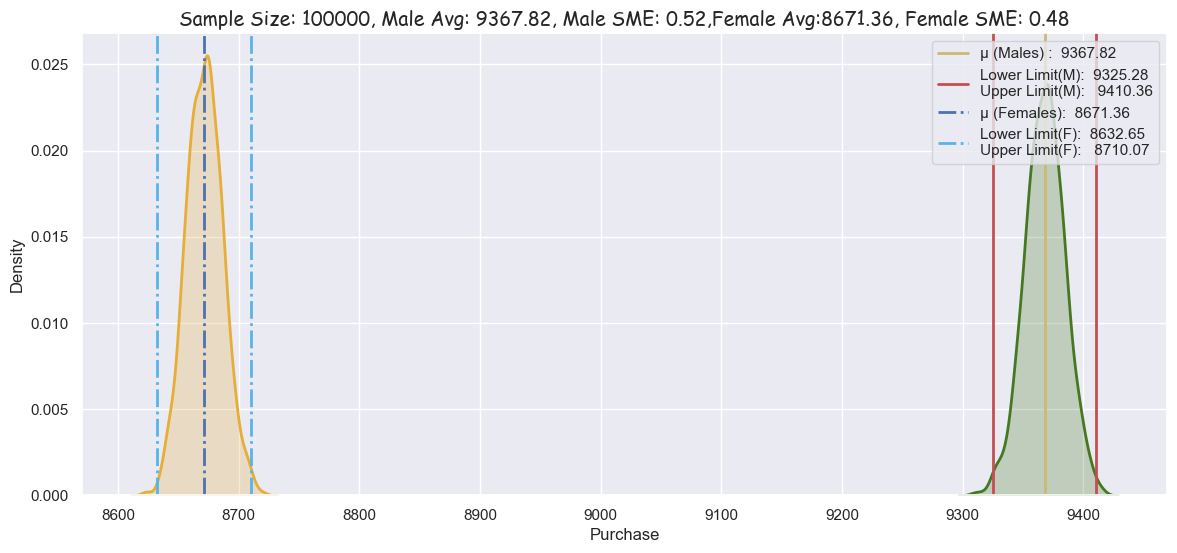

In [88]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping(retail_data_smp_male,retail_data_smp_female,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['M', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['F', ll_f, ul_f, smp_siz, ([ll_f,ul_f]) ,(ul_f-ll_f),99]]), axis=0)

overlap_99 = pd.DataFrame(array, columns = ['Gender','Lower_limit','Upper_limit',
                                            'Sample_Size','CI','Range','Confidence_pct'])
overlap = pd.concat([overlap, overlap_99], axis=0)

In [89]:
overlap_99.loc[(overlap_99['Gender'] == 'M') & (overlap_99['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
6       M      8626.2    10113.05         300  [8626.2, 10113.05]  1486.85   
8       M      8969.1     9769.95        1000   [8969.1, 9769.95]   800.85   
10      M     9325.28     9410.36      100000  [9325.28, 9410.36]    85.08   

   Confidence_pct  
6              99  
8              99  
10             99

In [90]:
overlap_99.loc[(overlap_99['Gender'] == 'F') & (overlap_99['Sample_Size'] >= 300)]

Gender Lower_limit Upper_limit Sample_Size                  CI    Range  \
7       F     7980.03     9378.64         300  [7980.03, 9378.64]  1398.61   
9       F     8293.46     9056.76        1000  [8293.46, 9056.76]    763.3   
11      F     8632.65     8710.07      100000  [8632.65, 8710.07]    77.42   

   Confidence_pct  
7              99  
9              99  
11             99

In [91]:
overlap.loc[(overlap['Gender'] == 'M') & (overlap['Sample_Size'] >= 10000)]

Gender Lower_limit Upper_limit Sample_Size                  CI  Range  \
10      M     9341.65     9395.64      100000  [9341.65, 9395.64]  53.99   
10      M     9336.85     9399.01      100000  [9336.85, 9399.01]  62.16   
10      M     9325.28     9410.36      100000  [9325.28, 9410.36]  85.08   

   Confidence_pct  
10             90  
10             95  
10             99

In [92]:
overlap.loc[(overlap['Gender'] == 'F') & (overlap['Sample_Size'] >= 10000)]

Gender Lower_limit Upper_limit Sample_Size                  CI  Range  \
11      F     8646.05     8696.34      100000  [8646.05, 8696.34]  50.29   
11      F     8641.61     8699.71      100000  [8641.61, 8699.71]   58.1   
11      F     8632.65     8710.07      100000  [8632.65, 8710.07]  77.42   

   Confidence_pct  
11             90  
11             95  
11             99

### Observations - 
1. Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%-

2. As the sample size increases, the Male and female groups start to become distinct

3. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.45

4. For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]

5. For Male range for mean purchase with confidence interval 90% is [9328.03, 9409.07]

6. When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]

### Recommendations
In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

### CLT Analysis for mean purchase with confidence 99% - Based on Marital Status

In [93]:
df_1['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df_1['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [94]:
df_1.sample(500,replace=True).groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std    min     25%     50%  \
Marital_Status                                                           
Married         198.0  8853.545455  4839.998899  746.0  5269.0  8024.5   
Unmarried       302.0  9125.006623  4982.386769   60.0  5893.5  7940.5   

                     75%      max  
Marital_Status                     
Married         11858.50  20148.0  
Unmarried       12005.75  20745.0

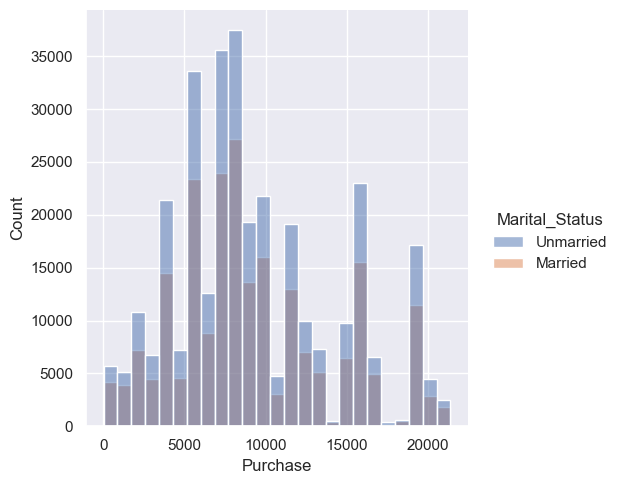

In [95]:
sns.displot(data = df_1, x = 'Purchase', hue = 'Marital_Status',bins = 25)
plt.show()

In [96]:
retail_data_smp_married = df_1[df_1['Marital_Status'] == 'Married']['Purchase']
retail_data_smp_unmarried = df_1[df_1['Marital_Status'] == 'Unmarried']['Purchase']

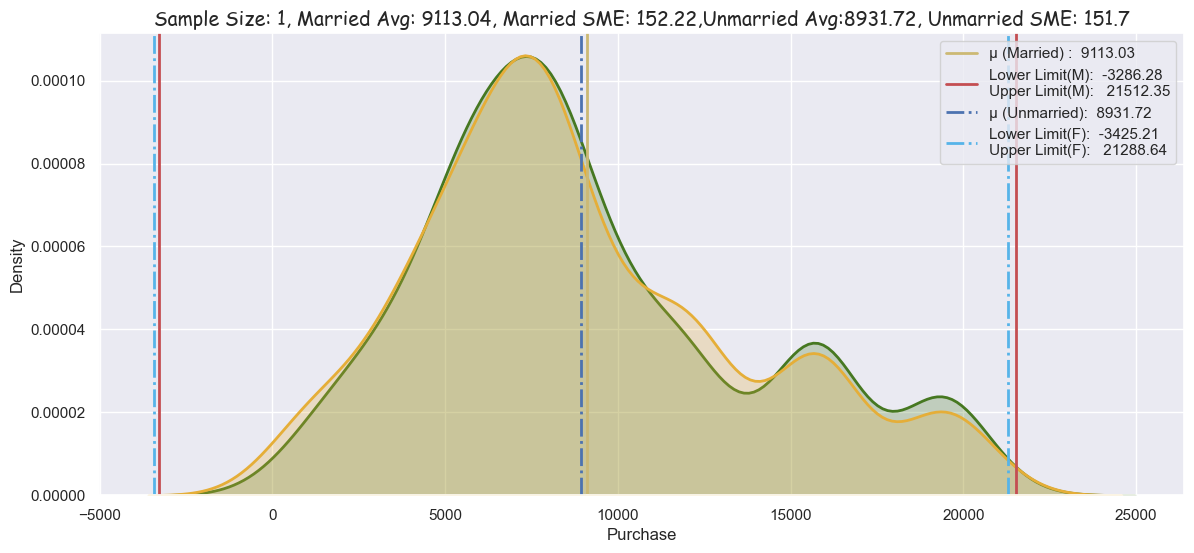

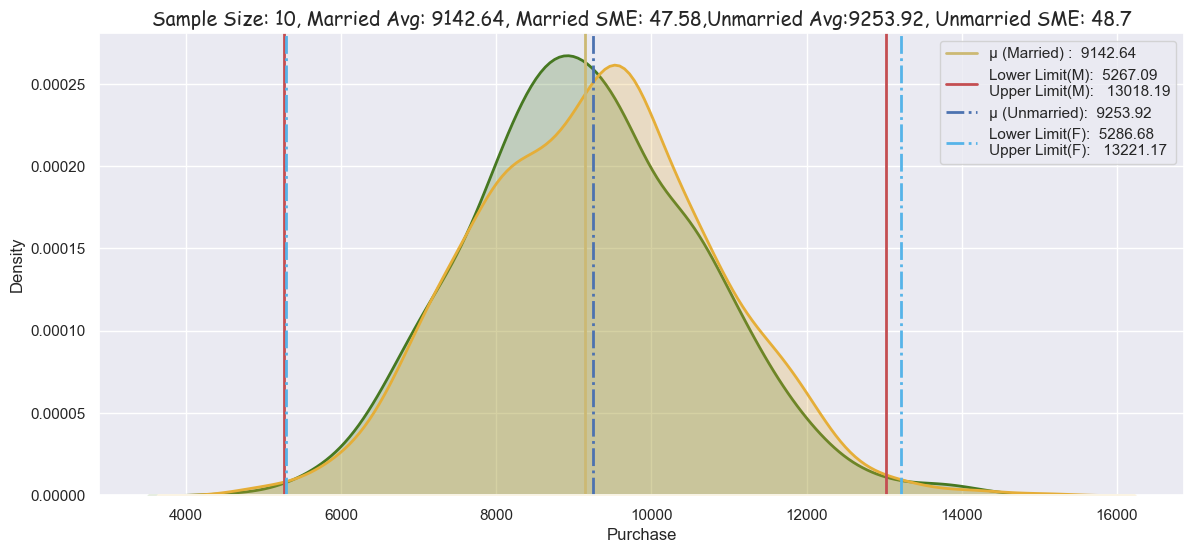

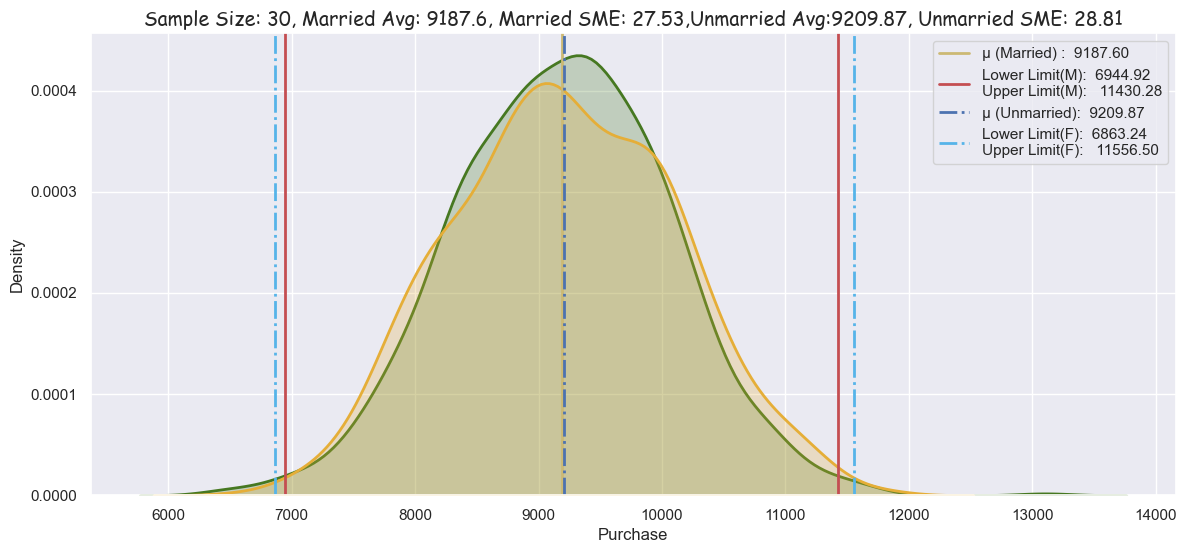

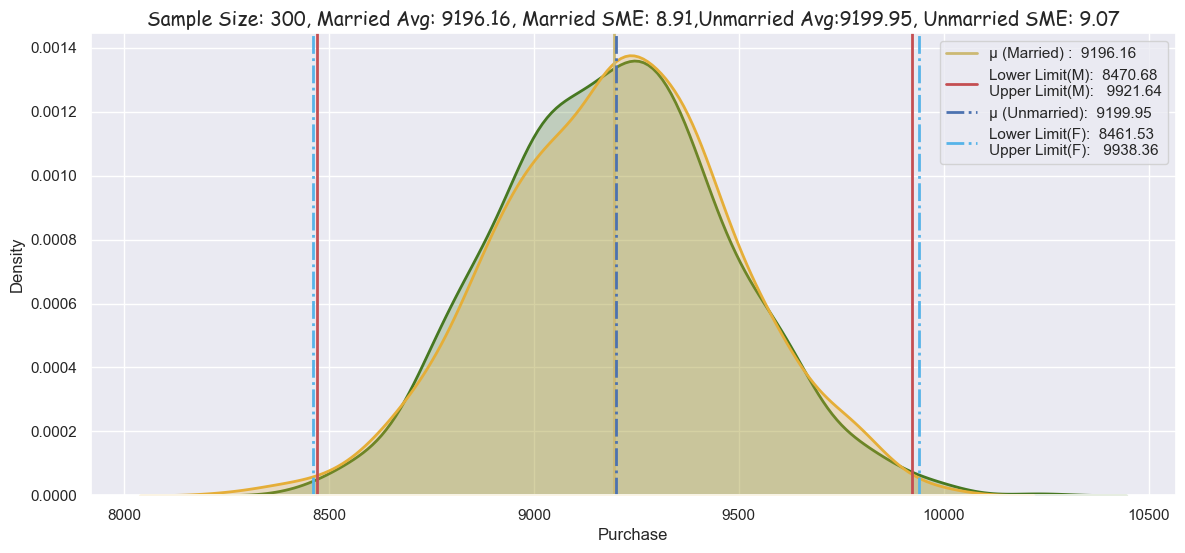

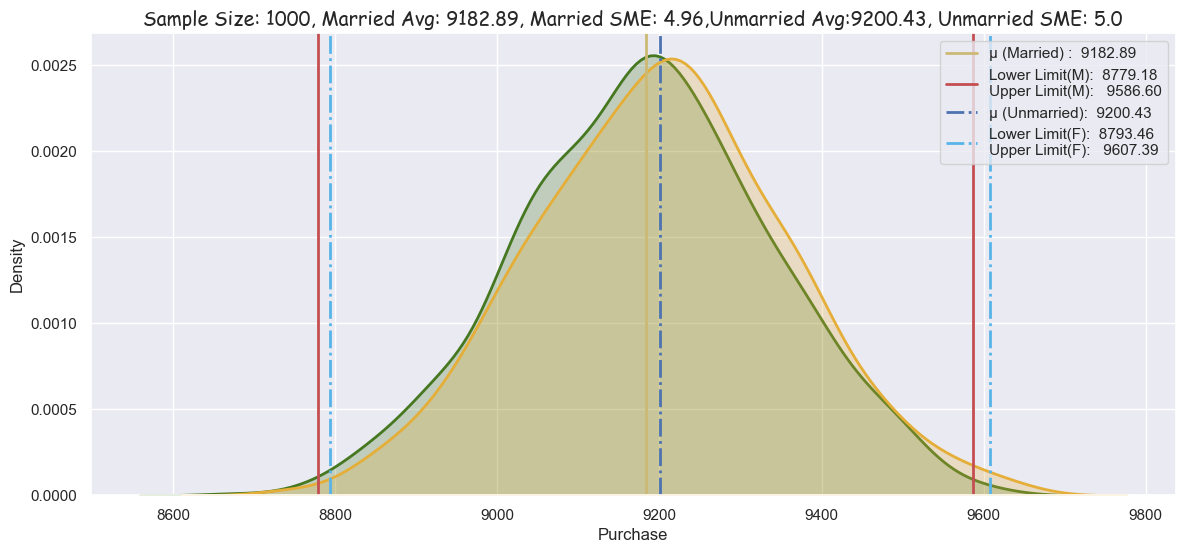

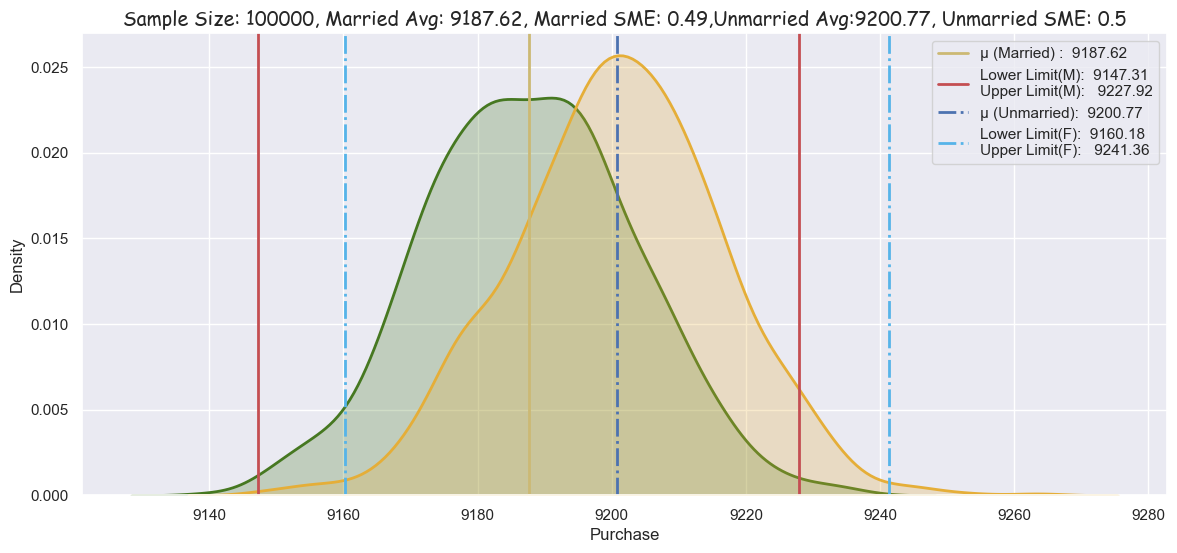

In [97]:
itr_size = 1000
size_list = [1, 10, 30, 300, 1000, 100000]
ci = 0.99

array = np.empty((0,7))

for smp_siz in size_list:
    m_avg, f_avg, ll_m, ul_m, ll_u, ul_u = bootstrapping_m_vs_um(retail_data_smp_married,
                                                                 retail_data_smp_unmarried,smp_siz,itr_size,ci)

    array = np.append(array, np.array([['Married', ll_m, ul_m, smp_siz, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
    array = np.append(array, np.array([['Unmarried', ll_u, ul_u, smp_siz, ([ll_u,ul_u]) ,(ul_u-ll_u),99]]), axis=0)

overlap = pd.DataFrame(array, columns = ['Marital_Status','Lower_limit','Upper_limit',
                                         'Sample_Size','CI','Range','Confidence_pct'])

In [98]:
overlap.head()

Marital_Status Lower_limit Upper_limit Sample_Size                    CI  \
0        Married    -3286.28    21512.35           1  [-3286.28, 21512.35]   
1      Unmarried    -3425.21    21288.64           1  [-3425.21, 21288.64]   
2        Married     5267.09    13018.19          10   [5267.09, 13018.19]   
3      Unmarried     5286.68    13221.17          10   [5286.68, 13221.17]   
4        Married     6944.92    11430.28          30   [6944.92, 11430.28]   

      Range Confidence_pct  
0  24798.63             99  
1  24713.85             99  
2    7751.1             99  
3   7934.49             99  
4   4485.36             99

In [99]:
overlap.loc[(overlap['Marital_Status'] == 'Married') & (overlap['Sample_Size'] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
6         Married     8470.68     9921.64         300  [8470.68, 9921.64]   
8         Married     8779.18      9586.6        1000   [8779.18, 9586.6]   
10        Married     9147.31     9227.92      100000  [9147.31, 9227.92]   

      Range Confidence_pct  
6   1450.96             99  
8    807.42             99  
10    80.61             99

In [100]:
overlap.loc[(overlap['Marital_Status'] == 'Unmarried') & (overlap['Sample_Size'] >= 300)]

Marital_Status Lower_limit Upper_limit Sample_Size                  CI  \
7       Unmarried     8461.53     9938.36         300  [8461.53, 9938.36]   
9       Unmarried     8793.46     9607.39        1000  [8793.46, 9607.39]   
11      Unmarried     9160.18     9241.36      100000  [9160.18, 9241.36]   

      Range Confidence_pct  
7   1476.83             99  
9    813.93             99  
11    81.18             99

### Observations - 
1. Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

2. For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9162.0, 9241.98]

3. For married customer range for mean purchase with confidence interval 90% is [9148.09, 9227.05]

### CLT Analysis for mean purchase with confidence 99% - Based on Age Group

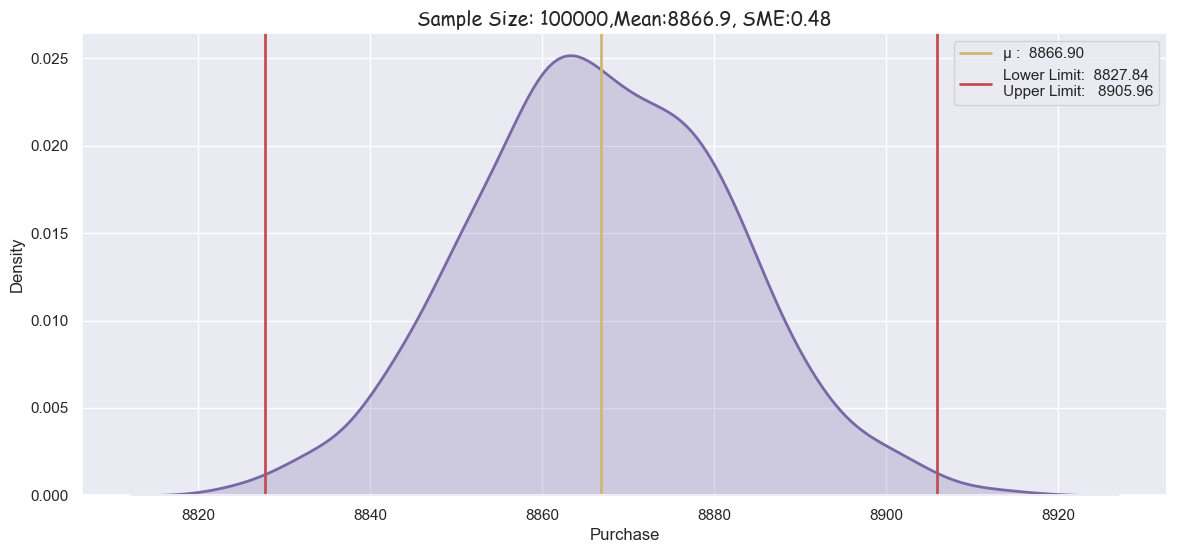

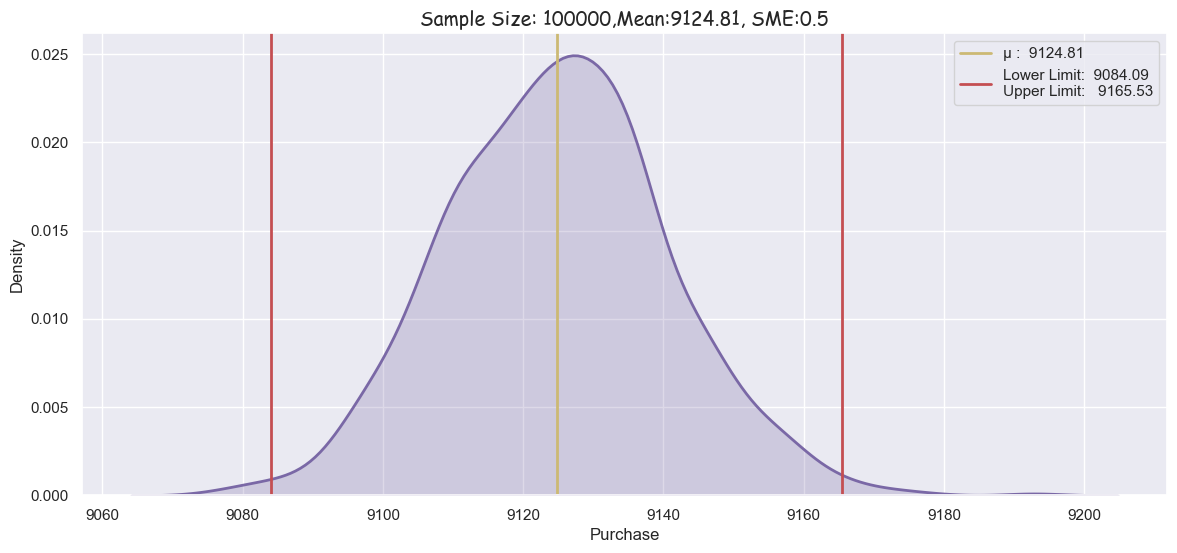

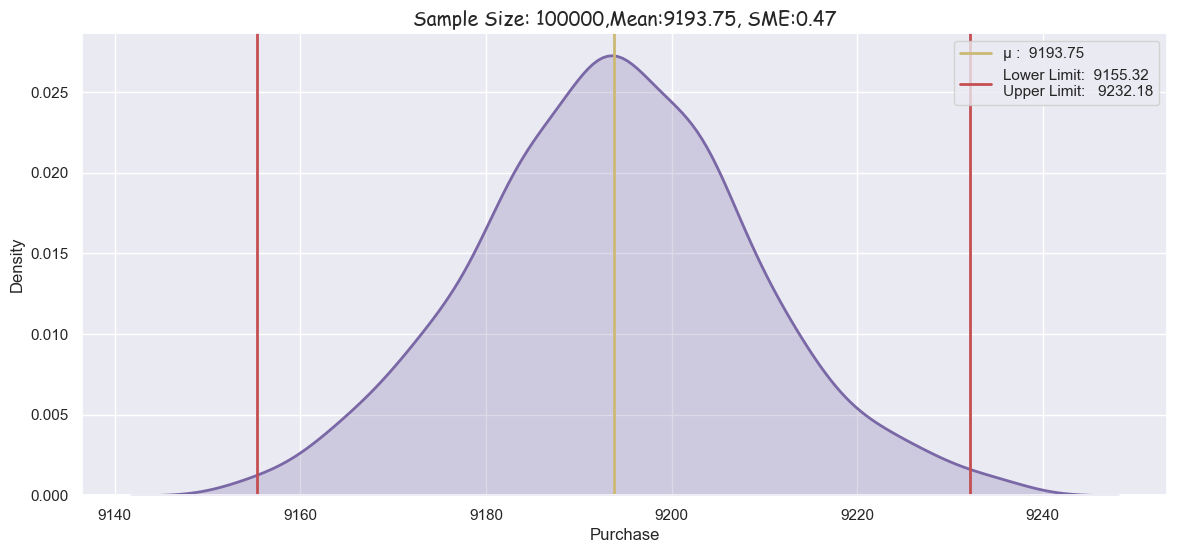

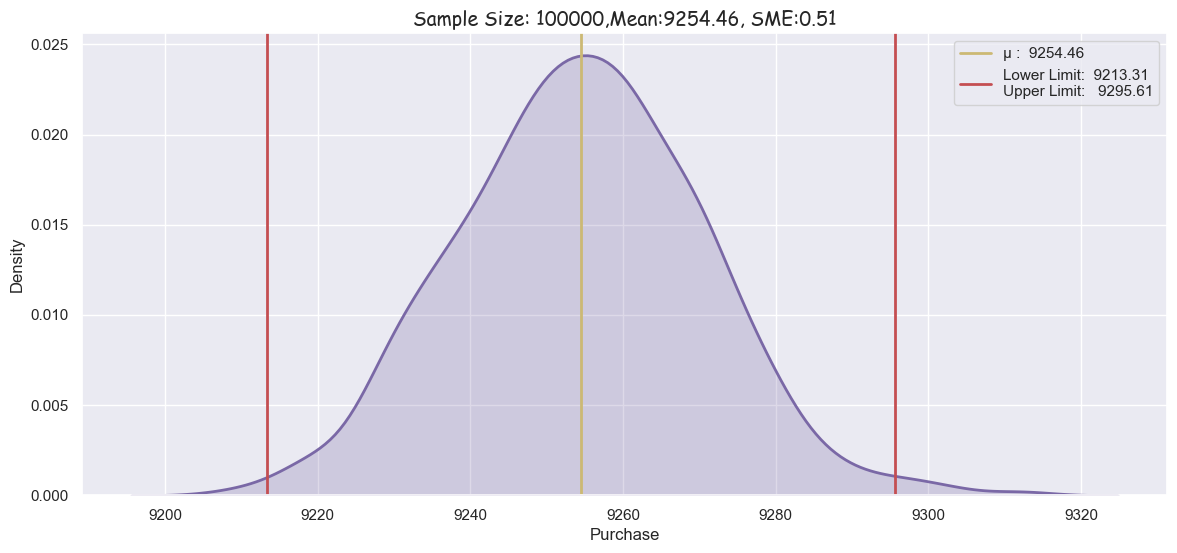

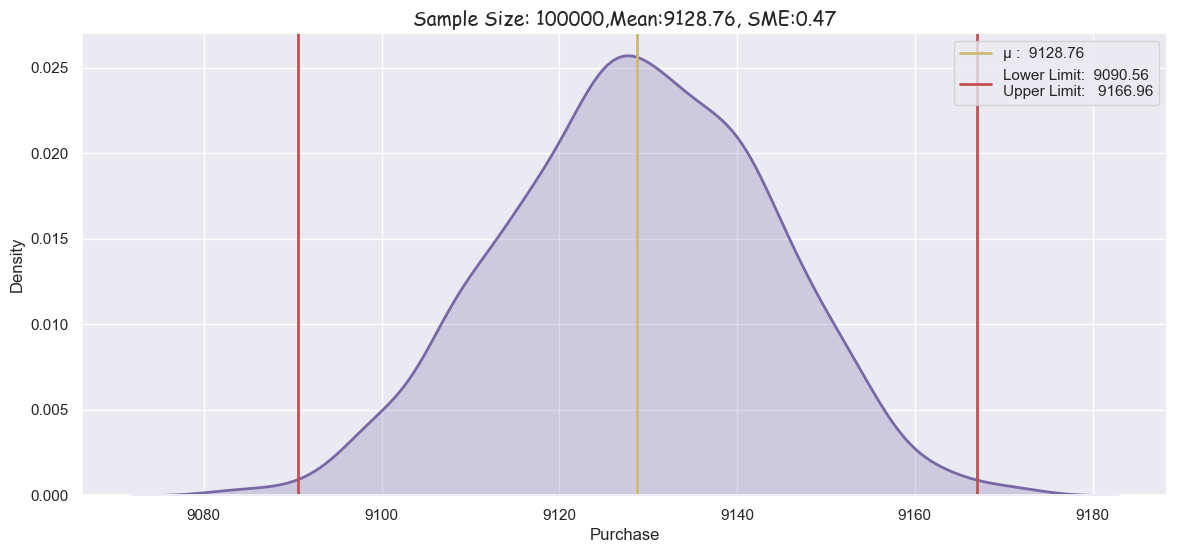

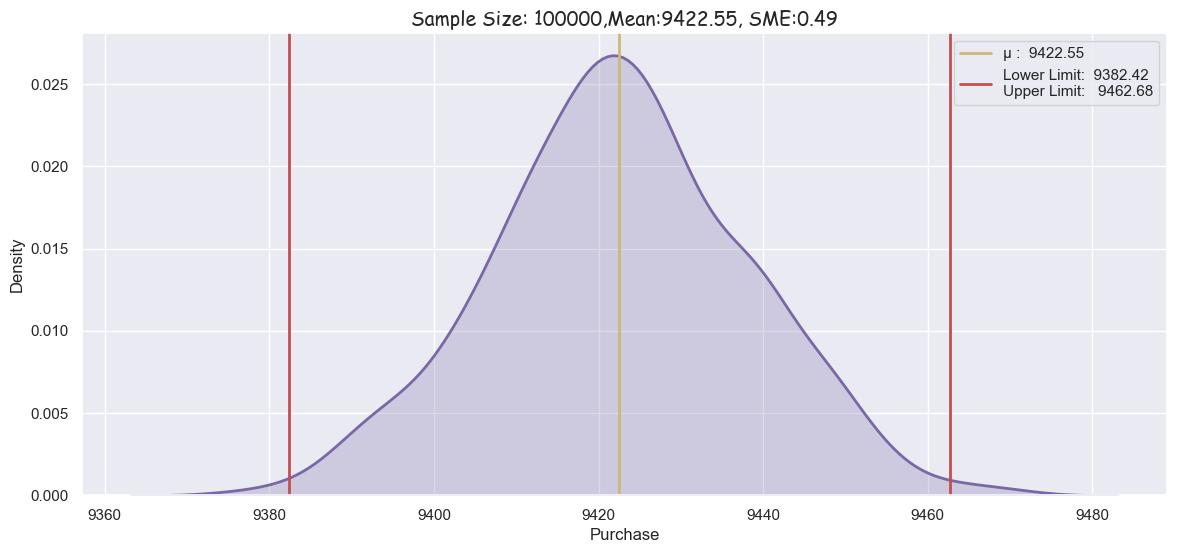

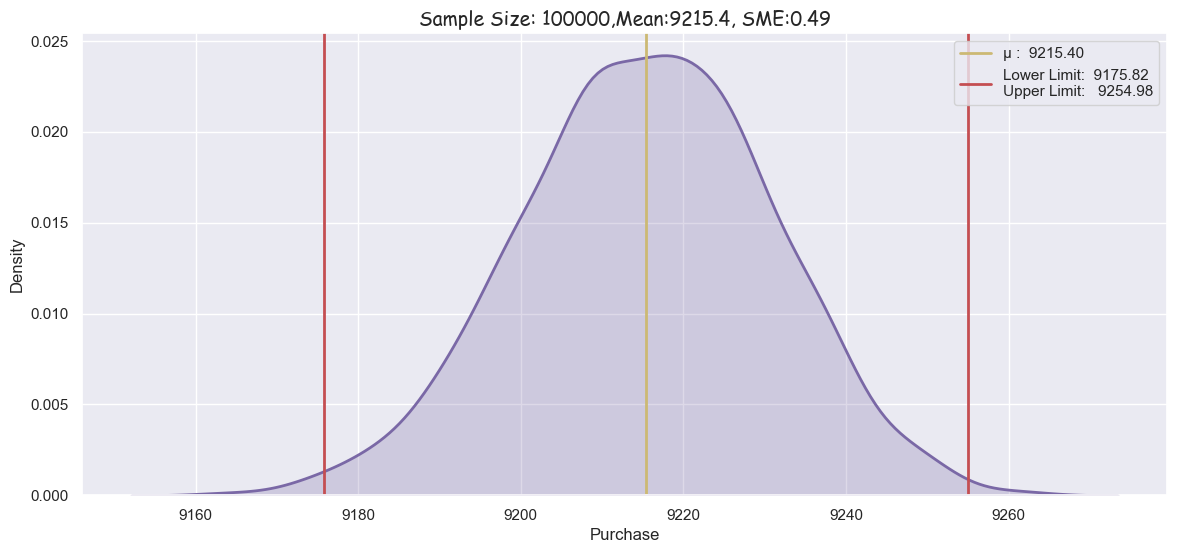

In [102]:
itr_size = 1000
smp_size = 1000
ci = 0.99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(df_1[df_1['Age'] == age]['Purchase'],smp_siz,itr_size,ci)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, smp_siz, 
                                        ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit',
                                          'Sample_Size','CI','Range','Confidence_pct'])

In [103]:
age_data.head(7)

Age_Group                                               Mean Lower_limit  \
0      0-17  [8875.1, 8865.31, 8865.28, 8859.11, 8897.64, 8...     8827.84   
1     18-25  [9104.82, 9127.68, 9117.03, 9083.36, 9144.41, ...     9084.09   
2     26-35  [9203.59, 9193.8, 9184.67, 9191.97, 9194.99, 9...     9155.32   
3     36-45  [9269.9, 9255.97, 9260.97, 9278.76, 9252.77, 9...     9213.31   
4     46-50  [9141.09, 9155.81, 9134.74, 9119.78, 9103.08, ...     9090.56   
5     51-55  [9411.73, 9398.41, 9405.53, 9445.35, 9399.79, ...     9382.42   
6       55+  [9227.77, 9213.54, 9225.34, 9188.98, 9207.21, ...     9175.82   

  Upper_limit Sample_Size                  CI  Range Confidence_pct  
0     8905.96      100000  [8827.84, 8905.96]  78.12             99  
1     9165.53      100000  [9084.09, 9165.53]  81.44             99  
2     9232.18      100000  [9155.32, 9232.18]  76.86             99  
3     9295.61      100000  [9213.31, 9295.61]   82.3             99  
4     9166.96      100000  [9090.56, 9166.96]   76.4             99  
5     9462.68      100000  [9382.42, 9462.68]  80.26             99  
6     9254.98      100000  [9175.82, 9254.98]  79.16             99

In [105]:
#Checking the Sampling distribution of a sample mean for each Age Group
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

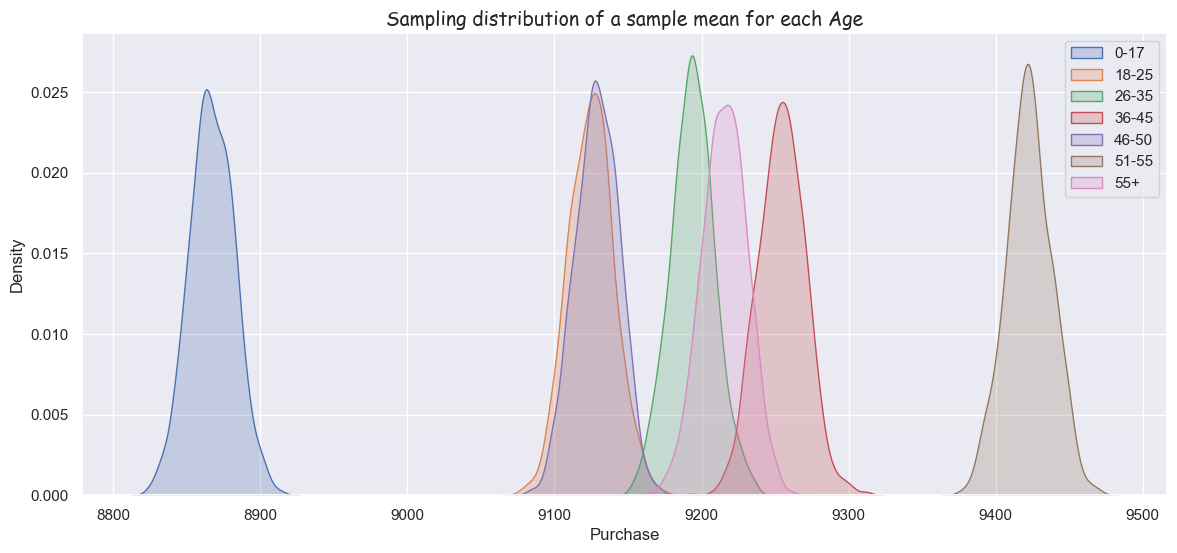

In [106]:
fig, ax = plt.subplots(figsize=(14,6))
sns.set_style("darkgrid")
for label_val in age_dict.keys():
    sns.kdeplot(age_dict[label_val], shade = True, label = label_val)

plt.title("Sampling distribution of a sample mean for each Age",fontsize=14,family="Comic Sans MS")
plt.xlabel('Purchase')
plt.legend(loc='upper right')

### Observations - 
Spending by Age_group 0-17 is low compared to other age groups.

Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7

### Recommendations
1. Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

2. The management should have some offers on kids (0-17 years) in order to increase sales.

3. In order to attract more young shoppers, they can offer some games for the younger generation.

### Observations based on EDA
1. The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

2. The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.

3. Majority of Customers purchase within the 5,000 - 20,000 range.

4. Males clearly purchase more than females. 75% of men and only 25% of women purchase products.

5. Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45

6. City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C

7. Most mall customers are between the ages of 26 and 35.City category C has more customers between the ages of 18 and 45.

8. In City Category C, there are slightly more female customers.

9. Product 5 and 8 is common among females.

### Observations based on Statistical Analysis (using CLT & CI)
1. As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 100000 is 0.49 with confidence is 90%.

2. Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

3. Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%

4. For Female (sample size 100000) range for mean purchase with confidence interval 99% is [8634.54, 8707.85]

5. For Male range for mean purchase with confidence interval 99% is [9328.03, 9409.07]

6. When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases. For Female Confidence percent as [90,95,99] have difference between the upper & lower limits as [50.46,59,73.31]

7. Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

8. Spending by Age_group 0-17 is low compared to other age groups.

9. Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7

### Recommendations
1. In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

2. Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

3. The management should have some offers on kids (0-17 years) in order to increase sales.

4. In order to attract more young shoppers, they can offer some games for the younger generation.
 